using a .fits file from HST  

In [1]:
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.convolution import convolve, Box1DKernel

hdul = fits.open("691108416_c1_e09_hor5_srs.fits")
hdul.info()
print(hdul[0].header)


Filename: 691108416_c1_e09_hor5_srs.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      16   (10220,)   float64   
SIMPLE  =                    T / conforms to FITS standard                      BITPIX  =                  -64 / array data type                                NAXIS   =                    1 / number of array dimensions                     NAXIS1  =                10220                                                  CRVAL1  =                848.2 / value of ref pixel                             CDELT1  =                0.005 / Binning factor                                 CUNIT1  = 'nm      '                                                            BUNIT   = 'adu     '                                                            OBJECT  = '691108416'                                                           RA      =    69.11083333333215                                                  DEC     =   -58.83666666666567   

In [2]:


fn = "691108416_c1_e09_hor5_srs.fits"
hdul = fits.open(fn)
flux = hdul[0].data.astype(float)
hdr  = hdul[0].header

crval = hdr["CRVAL1"]   # nm
cdelt = hdr["CDELT1"]   # nm/pix
n     = hdr["NAXIS1"]

wave_nm = crval + cdelt * np.arange(n)
wave_A  = wave_nm * 10.0  # Å

hcorr = hdr.get("HCORR", 0.0)  # km/s


print('heliocentric correction:', hcorr, 'km/s')
print('number of pixels:', n)
print('wavelength step: %.4f nm/pix' % cdelt)
print('starting wavelength: %.1f nm' % wave_nm[0])
print('wavelength range: %.1f - %.1f nm' % (wave_nm[0], wave_nm[-1]))



heliocentric correction: -1.625749919675429 km/s
number of pixels: 10220
wavelength step: 0.0050 nm/pix
starting wavelength: 848.2 nm
wavelength range: 848.2 - 899.3 nm


HCORR (km/s): -1.625750


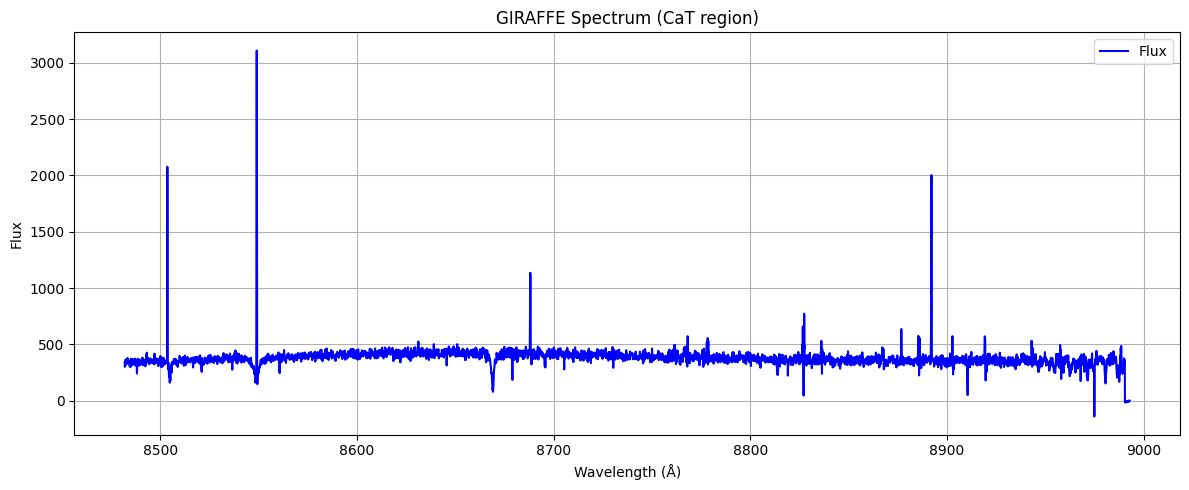

In [3]:

# Optional smoothing (step can be skipped)
# boxcar_width = 3
# flux = convolve(flux, Box1DKernel(boxcar_width))

# heliocentric correction via wavelength shift 
c_kms = 299_792.458
hcorr = float(hdr.get("HCORR", 0.0))  # km/s
wave_A = wave_A * (1.0 + hcorr / c_kms)
print(f"HCORR (km/s): {hcorr:.6f}")

# No error array in this file 
err = None

# Plot spectrum 
plt.figure(figsize=(12, 5))
plt.plot(wave_A, flux, label="Flux", color="blue")
plt.xlabel("Wavelength (Å)")
plt.ylabel("Flux")
plt.title("GIRAFFE Spectrum (CaT region)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

#  data_store
data_store = {
    "Obs_1": {
        "wavelength": wave_A,
        "flux": flux,
        "error": err,
        "header": hdr,
        "filename": fn
    }
}


In [4]:
# from astropy.io import fits
# import matplotlib.pyplot as plt
# import numpy as np
# import pandas as pd
# from astropy.convolution import convolve, Box1DKernel


# input_df = pd.DataFrame({
#     'Obs No.': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
#     'Obs': ['UVES.2025-04-26T00_59_00.524', 'UVES.2025-04-26T01_25_55.372', 'UVES.2025-04-26T01_55_20.893', 'UVES.2025-04-26T02_22_15.850', 'UVES.2025-04-27T01_01_59.451', 'UVES.2025-04-28T00_59_30.278', 'UVES.2025-04-28T01_55_09.310', 'UVES.2025-04-30T02_27_40.229', 'UVES.2025-05-01T01_53_52.193', 'UVES.2025-05-02T00_24_37.882', 'UVES.2025-05-02T01_22_11.148', 'UVES.2025-05-20T00_52_22.757', 'UVES.2025-05-20T01_15_07.402', 'UVES.2025-05-21T00_36_11.904'],   
#     'subfolder': ['2025-05-20T16:42:27.610283', '2025-05-20T16:42:27.610283', '2025-05-20T16:42:27.610283', '2025-05-20T16:42:27.610283', '2025-05-20T16:42:27.610283', '2025-05-20T16:42:27.610283', '2025-05-20T16:42:27.610283', '2025-05-20T16:42:27.610283', '2025-05-20T16:42:27.610283', '2025-05-20T16:42:27.610283', '2025-05-20T16:42:27.610283', '2025-05-29T15:15:26.257069','2025-05-29T15:15:26.257069', '2025-05-29T15:15:26.257069'],
#     'star': ['1', '1', '1', '1', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2'],
#     'REDL': ['Star 1_MERGED_SCI_POINT_REDL.fits', 'Star 1_MERGED_SCI_POINT_REDL.fits', 'Star 1_MERGED_SCI_POINT_REDL.fits', 'Star 1_MERGED_SCI_POINT_REDL.fits', 'Star 2_MERGED_SCI_POINT_REDL.fits', 'Star 2_MERGED_SCI_POINT_REDL.fits', 'Star 2_MERGED_SCI_POINT_REDL.fits', 'Star 2_MERGED_SCI_POINT_REDL.fits', 'Star 2_MERGED_SCI_POINT_REDL.fits', 'Star 2_MERGED_SCI_POINT_REDL.fits',  'Star 2_MERGED_SCI_POINT_REDL.fits', 'Star 2_MERGED_SCI_POINT_REDL.fits', 'Star 2_MERGED_SCI_POINT_REDL.fits',  'Star 2_MERGED_SCI_POINT_REDL.fits'],
#     'REDU': ['Star 1_MERGED_SCI_POINT_REDU.fits', 'Star 1_MERGED_SCI_POINT_REDU.fits', 'Star 1_MERGED_SCI_POINT_REDU.fits', 'Star 1_MERGED_SCI_POINT_REDU.fits','Star 2_MERGED_SCI_POINT_REDU.fits', 'Star 2_MERGED_SCI_POINT_REDU.fits', 'Star 2_MERGED_SCI_POINT_REDU.fits', 'Star 2_MERGED_SCI_POINT_REDU.fits','Star 2_MERGED_SCI_POINT_REDU.fits', 'Star 2_MERGED_SCI_POINT_REDU.fits', 'Star 2_MERGED_SCI_POINT_REDU.fits','Star 2_MERGED_SCI_POINT_REDU.fits', 'Star 2_MERGED_SCI_POINT_REDU.fits', 'Star 2_MERGED_SCI_POINT_REDU.fits'],
#     'ERRL': ['Star 1_ERRORBAR_SCI_POINT_REDL.fits', 'Star 1_ERRORBAR_SCI_POINT_REDL.fits', 'Star 1_ERRORBAR_SCI_POINT_REDL.fits', 'Star 1_ERRORBAR_SCI_POINT_REDL.fits', 'Star 2_ERRORBAR_SCI_POINT_REDL.fits', 'Star 2_ERRORBAR_SCI_POINT_REDL.fits', 'Star 2_ERRORBAR_SCI_POINT_REDL.fits', 'Star 2_ERRORBAR_SCI_POINT_REDL.fits', 'Star 2_ERRORBAR_SCI_POINT_REDL.fits', 'Star 2_ERRORBAR_SCI_POINT_REDL.fits', 'Star 2_ERRORBAR_SCI_POINT_REDL.fits', 'Star 2_ERRORBAR_SCI_POINT_REDL.fits', 'Star 2_ERRORBAR_SCI_POINT_REDL.fits', 'Star 2_ERRORBAR_SCI_POINT_REDL.fits'],
#     'ERRU': ['Star 1_ERRORBAR_SCI_POINT_REDU.fits',  'Star 1_ERRORBAR_SCI_POINT_REDU.fits', 'Star 1_ERRORBAR_SCI_POINT_REDU.fits', 'Star 1_ERRORBAR_SCI_POINT_REDU.fits', 'Star 2_ERRORBAR_SCI_POINT_REDU.fits', 'Star 2_ERRORBAR_SCI_POINT_REDU.fits', 'Star 2_ERRORBAR_SCI_POINT_REDU.fits', 'Star 2_ERRORBAR_SCI_POINT_REDU.fits', 'Star 2_ERRORBAR_SCI_POINT_REDU.fits', 'Star 2_ERRORBAR_SCI_POINT_REDU.fits', 'Star 2_ERRORBAR_SCI_POINT_REDU.fits', 'Star 2_ERRORBAR_SCI_POINT_REDU.fits', 'Star 2_ERRORBAR_SCI_POINT_REDU.fits', 'Star 2_ERRORBAR_SCI_POINT_REDU.fits'],
# })

# input_df



In [5]:
# from astropy.coordinates import Angle
# import astropy.units as u
# from astropy.io import fits
# import numpy as np
# import pandas as pd

# # --- First build the main table with header keywords ---
# ra_dec_sexagesimal = []

# for n in range(1, 15):
#     row = input_df[input_df['Obs No.'] == n].iloc[0]
#     path = f"{row['Obs']}/{row['subfolder']}/{row['REDU']}"
#     try:
#         header = fits.getheader(path)
#         ra_deg = header.get('RA', np.nan)
#         dec_deg = header.get('DEC', np.nan)
#         ra_hms = Angle(ra_deg, unit=u.deg).to_string(unit=u.hourangle, sep=':', precision=2, pad=True) if np.isfinite(ra_deg) else 'NaN'
#         dec_dms = Angle(dec_deg, unit=u.deg).to_string(unit=u.deg, sep=':', precision=2, alwayssign=True, pad=True) if np.isfinite(dec_deg) else 'NaN'

#         # Extract selected header keywords
#         object_name = header.get('OBJECT', 'NaN')
#         date_obs = header.get('DATE-OBS', 'NaN')
#         mjd_obs = header.get('MJD-OBS', np.nan)
#         obs_id = header.get('HIERARCH ESO OBS ID', 'NaN')
#         tpl_id = header.get('HIERARCH ESO TPL ID', 'NaN')
#         obs_name = header.get('HIERARCH ESO OBS NAME', 'NaN')
#         exptime = header.get('EXPTIME', np.nan)

#     except FileNotFoundError:
#         ra_deg = dec_deg = np.nan
#         ra_hms = dec_dms = 'NaN'
#         object_name = date_obs = obs_id = tpl_id = obs_name = 'NaN'
#         mjd_obs = np.nan

#     ra_dec_sexagesimal.append({
#         'Obs No.': n,
#         'RA (deg)': ra_deg,
#         'DEC (deg)': dec_deg,
#         'RA (hms)': ra_hms,
#         'DEC (dms)': dec_dms,
#         'OBJECT': object_name,
#         'DATE-OBS': date_obs,
#         'MJD-OBS': mjd_obs,
#         'ESO OBS ID': obs_id,
#         'TPL ID': tpl_id,
#         'OBS NAME': obs_name,
#         'EXPTIME (s)': exptime
#     })

# ra_dec_sex_df = pd.DataFrame(ra_dec_sexagesimal)

# # --- Now calculate offsets from target position ---
# target_ra = Angle('11:38:51.707', unit=u.hourangle)
# target_dec = Angle('31:03:41.201', unit=u.deg)

# delta_columns = []

# for i, row in ra_dec_sex_df.iterrows():
#     try:
#         ra = Angle(row['RA (hms)'], unit=u.hourangle)
#         dec = Angle(row['DEC (dms)'], unit=u.deg)

#         delta_ra = (ra - target_ra).wrap_at(12 * u.hourangle)
#         delta_dec = dec - target_dec

#         delta_ra_str = delta_ra.to_string(unit=u.hourangle, sep=':', precision=3, alwayssign=True, pad=True)
#         delta_dec_str = delta_dec.to_string(unit=u.deg, sep=':', precision=3, alwayssign=True, pad=True)

#     except Exception:
#         delta_ra_str = 'NaN'
#         delta_dec_str = 'NaN'

#     delta_columns.append({
#         'dist_from_star2_target RA (hms)': delta_ra_str,
#         'dist_from_star2_target DEC (dms)': delta_dec_str
#     })

# delta_df = pd.DataFrame(delta_columns)
# ra_dec_sex_df = pd.concat([ra_dec_sex_df, delta_df], axis=1)

# # --- Now calculate offsets from target position ---
# target_ra = Angle('11:38:47.296', unit=u.hourangle)
# target_dec = Angle('31:02:13.424', unit=u.deg)

# delta_columns = []

# for i, row in ra_dec_sex_df.iterrows():
#     try:
#         ra = Angle(row['RA (hms)'], unit=u.hourangle)
#         dec = Angle(row['DEC (dms)'], unit=u.deg)

#         delta_ra = (ra - target_ra).wrap_at(12 * u.hourangle)
#         delta_dec = dec - target_dec

#         delta_ra_str1 = delta_ra.to_string(unit=u.hourangle, sep=':', precision=3, alwayssign=True, pad=True)
#         delta_dec_str1 = delta_dec.to_string(unit=u.deg, sep=':', precision=3, alwayssign=True, pad=True)

#     except Exception:
#         delta_ra_str1 = 'NaN'
#         delta_dec_str1 = 'NaN'

#     delta_columns.append({
#         'dist_from_star1_target RA (hms)': delta_ra_str1,
#         'dist_from_star1_target DEC (dms)': delta_dec_str1
#     })


# delta_df = pd.DataFrame(delta_columns)
# ra_dec_sex_df = pd.concat([ra_dec_sex_df, delta_df], axis=1)
# ra_dec_sex_df[0:15]  # Show rows 3 to 12 (Obs No. 4 to 13)




In [6]:
# n = 1  # choose Obs No.
# row = input_df[input_df['Obs No.'] == n].iloc[0]
# header = fits.getheader(f"{row['Obs']}/{row['subfolder']}/{row['REDU']}")
# print(repr(header))  # full header (optional)
# print("RA:", header.get('RA', 'RA not found'), "DEC:", header.get('DEC', 'DEC not found'))

In [4]:
import pandas as pd


spectral_lines = pd.DataFrame([
{"Label": "Ca II K",     "Wavelength": 3933.66},
    {"Label": "Ca II H",     "Wavelength": 3968.47},
    {"Label": "Ca I 4227",   "Wavelength": 4226.73},
    {"Label": "Fe I 4046",   "Wavelength": 4045.81},
    {"Label": "Fe I 4384",   "Wavelength": 4383.55},
    {"Label": "Fe I 5270",   "Wavelength": 5270.36},
    {"Label": "Fe I 5328",   "Wavelength": 5328.04},
    {"Label": "Mg I b1",     "Wavelength": 5167.32},
    {"Label": "Mg I b2",     "Wavelength": 5172.68},
    {"Label": "Mg I b3",     "Wavelength": 5183.60},
    {"Label": "He I 4471",   "Wavelength": 4471.5},
    {"Label": "H γ",         "Wavelength": 4340.5},
    {"Label": "H β",         "Wavelength": 4861.3},
    {"Label": "Na I D1",     "Wavelength": 5890.0},
    {"Label": "Na I D2",     "Wavelength": 5896.0},
    {"Label": "H α",         "Wavelength": 6562.8},
    {"Label": "Ca II 8498",  "Wavelength": 8498.02},
    {"Label": "Ca II 8542",  "Wavelength": 8542.09},
    {"Label": "Ca II 8662",  "Wavelength": 8662.14}
])

spectral_lines

Label  Wavelength
0      Ca II K     3933.66
1      Ca II H     3968.47
2    Ca I 4227     4226.73
3    Fe I 4046     4045.81
4    Fe I 4384     4383.55
5    Fe I 5270     5270.36
6    Fe I 5328     5328.04
7      Mg I b1     5167.32
8      Mg I b2     5172.68
9      Mg I b3     5183.60
10   He I 4471     4471.50
11         H γ     4340.50
12         H β     4861.30
13     Na I D1     5890.00
14     Na I D2     5896.00
15         H α     6562.80
16  Ca II 8498     8498.02
17  Ca II 8542     8542.09
18  Ca II 8662     8662.14

Synthetic template loaded: synthspec.fits
λ range: 8400.0–8900.0 Å, Npix=10000
min / median / max flux: 0.4708, 0.9980, 0.9999


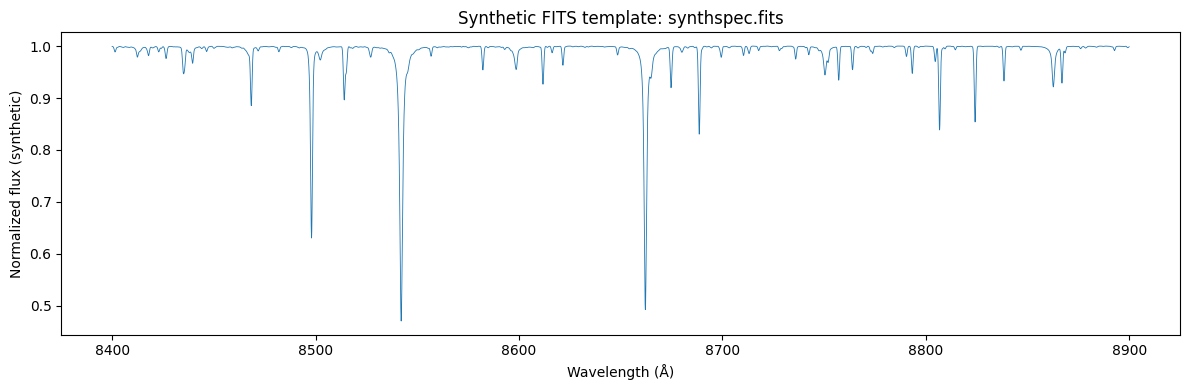

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits

# Define the path to your synthetic FITS file
syn_fits = "synthspec.fits"  

def load_syn_fits(path):
    with fits.open(path) as hdul:
        syn_flux = hdul[0].data.astype(float)
        syn_hdr  = hdul[0].header

    # Build synthetic wavelength grid
    syn_crval = syn_hdr["CRVAL1"]
    syn_cdelt = syn_hdr["CDELT1"]
    syn_npix  = syn_hdr["NAXIS1"]

    syn_wave = syn_crval + syn_cdelt * np.arange(syn_npix)

    # Handle wavelength units safely
    syn_cunit = syn_hdr.get("CUNIT1", "").strip().lower()
    syn_wave = syn_wave * 10.0   # nm → Å

    # Normalise synthetic if needed
    syn_flux_norm = syn_flux.copy()
    med = np.nanmedian(syn_flux_norm)
    if med > 1.5:   # heuristic: absolute flux → normalize
        syn_flux_norm /= med

    return syn_wave, syn_flux_norm, syn_hdr


syn_wave, syn_flux_norm, syn_hdr = load_syn_fits(syn_fits)

print(f"Synthetic template loaded: {syn_fits}")
print(f"λ range: {syn_wave[0]:.1f}–{syn_wave[-1]:.1f} Å, Npix={syn_wave.size}")
print(f"min / median / max flux: "
      f"{syn_flux_norm.min():.4f}, "
      f"{np.median(syn_flux_norm):.4f}, "
      f"{syn_flux_norm.max():.4f}")


plt.figure(figsize=(12,4))
plt.plot(syn_wave, syn_flux_norm, lw=0.6)
plt.xlabel("Wavelength (Å)")
plt.ylabel("Normalized flux (synthetic)")
plt.title(f"Synthetic FITS template: {syn_fits}")
plt.tight_layout()
plt.show()

syn_store = {
    "Template_1": {
        "wavelength": syn_wave,
        "flux": syn_flux_norm,
        "header": syn_hdr,
        "filename": syn_fits
    }
}




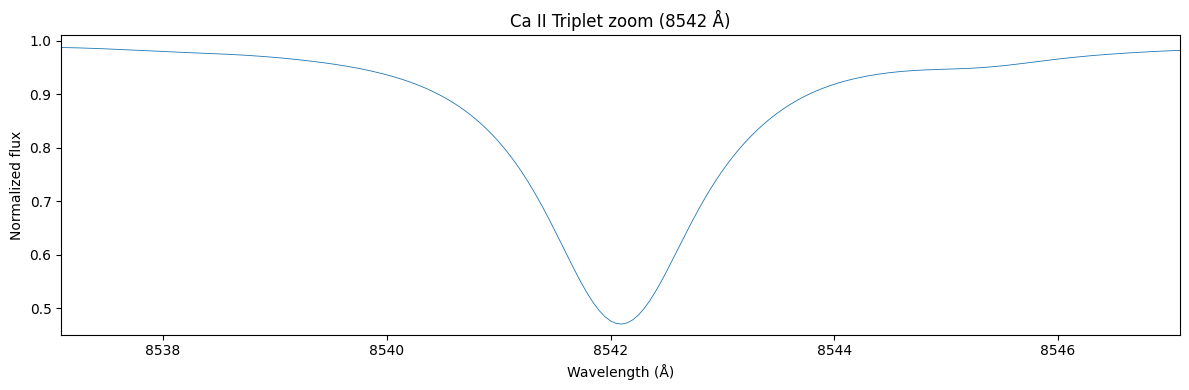

In [6]:
plt.figure(figsize=(12,4))
plt.plot(syn_wave, syn_flux_norm, lw=0.6)
w0 = 8542.09  # CaT line
mask = (syn_wave > w0-5) & (syn_wave < w0+5)
plt.xlim(w0-5, w0+5)
plt.ylim(syn_flux_norm[mask].min() - 0.02, 1.01)
plt.xlabel("Wavelength (Å)")
plt.ylabel("Normalized flux")
plt.title("Ca II Triplet zoom (8542 Å)")
plt.tight_layout()
plt.show()



In [ ]:
# THIS IS FOR TAKEING IN K2 .SYN FILES  - note issue above 8000 A region...??
# import numpy as np
# import matplotlib.pyplot as plt

# # --- set your template path here ---
# # syn_path = "am057t5030g200k120_cl_ap04_8000_9200_R20000.syn"   # <-- change to your actual .syn file
# # syn_path = "am165t5500g200k120_cl_ap02_8400_9050_R18000.syn"   # <-- change to your actual .syn file"   # <-- change to your actual .syn file
# syn_path = "am170t5257g319k050_cl_ap04_5000_9000_R18000.syn"   # <-- change to your actual .syn file

# # syn_path = "am170t6183g405k200_cl_ap04_4500_7000_R40000.syn"   # STAR 2<-- change to your actual .syn file   
# #    am220 = [M/H] –2.20; t5507 = Teff 5507 K; g346 = log g 3.46 (cgs); k200 = microturbulence 2.0 km/s; cl = classical ATLAS9 convection; ap04 = [α/Fe] +0.4; 4500_7000 = wavelength range 4500–7000 Å; R40000 = resolving power λ/Δλ = 40,000

# # Flexible loader for K2 .syn (handles 2- or 4-column variants)
# def load_k2_syn(path):
#     arr = np.genfromtxt(path, comments='#')
#     lam = arr[:, 0]
#     if arr.shape[1] >= 2:
#         fnorm = arr[:, 1]              # NORM. FLUX (preferred)
#     else:
#         raise ValueError("Template missing normalized column.")
#     # sanity check; if it's not ~flat around 1, recompute from line/cont if present
#     med = np.nanmedian(fnorm)
#     if not (0.9 < med < 1.1) and arr.shape[1] >= 4:
#         fnorm = arr[:, 1] / arr[:, 3]  # LINE/CONT fallback    -   NORMALISE by dividing line by cont (column 1 / column 3)
#     return lam, fnorm

# lam_t, fnorm_t = load_k2_syn(syn_path)  # this line calls the function above and runs it with the syn_path set above

# print(f"Template loaded: {syn_path}")
# print(f"λ range: {lam_t[0]:.1f}–{lam_t[-1]:.1f} Å, Npix={lam_t.size}")

# # Quick look
# plt.figure(figsize=(12,4))
# plt.plot(lam_t, fnorm_t, lw=0.6)    #  lambda (wavelength) form the synthetic spectrum  and  fnorm (normalized flux)  from the synthetic spectra
# plt.xlabel("Wavelength (Å)"); plt.ylabel("Normalized flux (template)")
# plt.title(f"K2 synthetic:   {syn_path}")
# plt.tight_layout()
# plt.xlim(lam_t[0], lam_t[-1])
# # plt.ylim(0.9999, 1.00001)
# # plt.xlim(8535, 8545)
# plt.show()


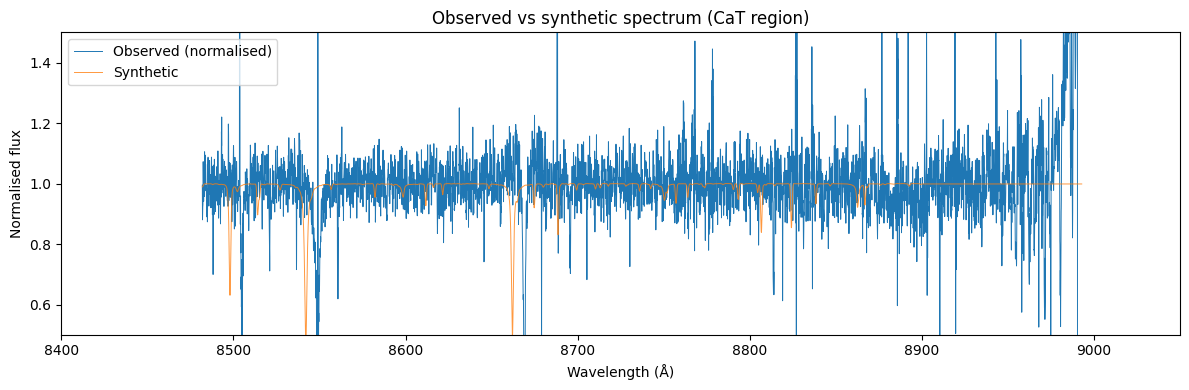

In [7]:
wmin, wmax = 8400.0, 9050.0

# observed
m_obs = (wave_A >= wmin) & (wave_A <= wmax)
lam_o = wave_A[m_obs]
flux_o = flux[m_obs]

# synthetic
m_syn = (syn_wave >= wmin) & (syn_wave <= wmax)
lam_s = syn_wave[m_syn]
flux_s = syn_flux_norm[m_syn]

from astropy.convolution import convolve, Box1DKernel

box = Box1DKernel(501)

cont_o = convolve(
    np.clip(flux_o, np.percentile(flux_o, 0.5), None),
    box,
    boundary="extend"
)
cont_o[cont_o <= 0] = np.nanmedian(cont_o[cont_o > 0])

fnorm_o = flux_o / cont_o

# interpolate synthetic onto observed wavelength grid
syn_on_obs = np.interp(lam_o, lam_s, flux_s)

#plot

plt.figure(figsize=(12,4))

plt.plot(lam_o, fnorm_o, lw=0.7, label="Observed (normalised)")
plt.plot(lam_o, syn_on_obs, lw=0.7, alpha=0.8, label="Synthetic")

plt.xlabel("Wavelength (Å)")
plt.ylabel("Normalised flux")
plt.title("Observed vs synthetic spectrum (CaT region)")
plt.xlim(wmin, wmax)
plt.ylim(0.5, 1.5)

plt.legend()
plt.tight_layout()
plt.show()



Peak correlation RV = 164.17 km/s  |  rvstep ≈ 1.73 km/s  |  N=7800  |  skipedge=50


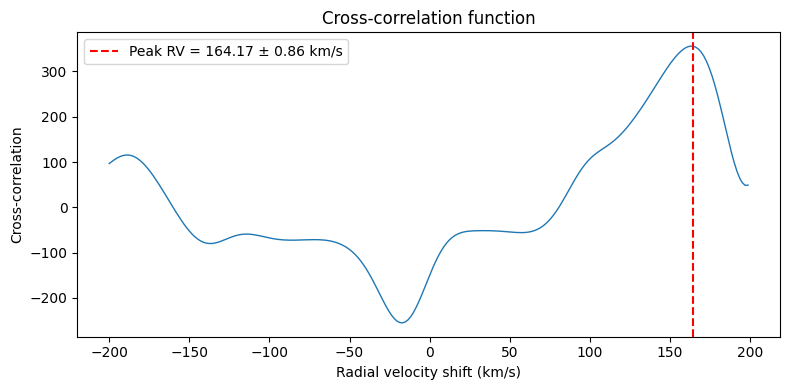

In [8]:


from PyAstronomy import pyasl

c_kms = 299_792.458
rv_half_range = 200.0


from astropy.convolution import convolve, Box1DKernel

# Pull observed spectrum from data_store
wavelength = data_store["Obs_1"]["wavelength"]
flux       = data_store["Obs_1"]["flux"].astype(float)

# Restrict region (CaT-ish; adjust if you want)
wmin, wmax = 8490.0, 8880.0
sel   = (wavelength >= wmin) & (wavelength <= wmax)
lam_o  = wavelength[sel].copy()
flux_o = flux[sel].copy()

# Pseudo-continuum + normalization
box = Box1DKernel(501)
cont_o = convolve(np.clip(flux_o, np.percentile(flux_o, 0.5), None), box, boundary="extend")
cont_o[cont_o <= 0] = np.nanmedian(cont_o[cont_o > 0])
fnorm_o = flux_o / cont_o


# Start from your observed arrays and the 'core' mask you already built
w_obs_full = lam_o
f_obs_full = fnorm_o.astype(float)

# 1) Core + finite mask on OBS
obs_mask = np.isfinite(w_obs_full) & np.isfinite(f_obs_full)
w_obs = w_obs_full[obs_mask]
f_obs = f_obs_full[obs_mask]

# 2) Finite + monotonic template (native grid; do NOT use w_obs here)
w_tpl = syn_wave
f_tpl = syn_flux_norm.astype(float)
tpl_mask = np.isfinite(w_tpl) & np.isfinite(f_tpl)
w_tpl = w_tpl[tpl_mask]; f_tpl = f_tpl[tpl_mask]
if w_obs[0] > w_obs[-1]: w_obs = w_obs[::-1]; f_obs = f_obs[::-1]
if w_tpl[0] > w_tpl[-1]: w_tpl = w_tpl[::-1]; f_tpl = f_tpl[::-1]

# 3) Trim observed to the RV-safe overlap (still after 'core')
rvmin, rvmax = -rv_half_range, rv_half_range
low_bound  = max(w_obs.min(), w_tpl.min() * (1.0 + rvmax / c_kms))
high_bound = min(w_obs.max(), w_tpl.max() * (1.0 + rvmin / c_kms))
keep = (w_obs >= low_bound) & (w_obs <= high_bound)
w_obs = w_obs[keep]; f_obs = f_obs[keep]

# 4) Z-score (optional)
f_obs = (f_obs - np.nanmean(f_obs)) / (np.nanstd(f_obs) or 1.0)
f_tpl = (f_tpl - np.nanmean(f_tpl)) / (np.nanstd(f_tpl) or 1.0)

# 5) Step, skipedge, and XCORR
dlam  = np.median(np.diff(w_obs))
rvstep = dlam * c_kms / np.median(w_obs)
safe_skip = max(0, min(len(w_obs)//100, 50))

RV, CC = pyasl.crosscorrRV(w_obs, f_obs, w_tpl, f_tpl,
                           rvmin, rvmax, rvstep, skipedge=safe_skip)



# Results/plot
peak_index = np.argmax(CC)
best_rv = RV[peak_index]
print(f"Peak correlation RV = {best_rv:.2f} km/s  |  rvstep ≈ {rvstep:.2f} km/s  |  N={len(w_obs)}  |  skipedge={safe_skip}")

plt.figure(figsize=(8,4))
plt.plot(RV, CC, lw=1)
plt.axvline(best_rv, color='r', ls='--', label=f'Peak RV = {best_rv:.2f} ± {rvstep/2:.2f} km/s')
plt.xlabel("Radial velocity shift (km/s)")
plt.ylabel("Cross-correlation")
plt.title(f"Cross-correlation function")
plt.legend(); plt.tight_layout(); plt.show()


RV (grid-peak): 164.168 km/s   (limited by rvstep=1.726 km/s)
RV (Gaussian fit): 162.020 ± 0.181 km/s
CCF FWHM: 200.00 ± 1390.57 km/s - describes shape of CCF peak (specifically its full-width-at-half-maximum) - reflecing widths of lines in spectra
Tonry–Davis R: 38.68   (higher is better)
RV (Tonry–Davis error): ± 1.890 km/s


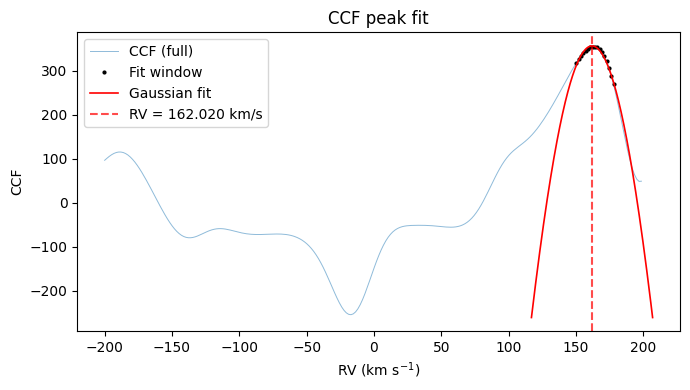

In [10]:
# --- Gaussian fit of the CCF peak for sub-grid RV ---

from scipy.optimize import curve_fit
import numpy as np
import matplotlib.pyplot as plt

def gaussian(x, amp, mu, fwhm, off):
    # convert FWHM <-> sigma: FWHM = 2*sqrt(2*ln2)*sigma
    sigma = fwhm / (2*np.sqrt(2*np.log(2)))
    return amp * np.exp(-(x-mu)**2/(2*sigma**2)) + off

# 1) pick a window around the grid peak
i0   = np.argmax(CC)
mu0  = RV[i0]   # grid peak RV, as a first guess for guassian fit centre    [does the same as (best_rv = RV[peak_index]) line in above cell]
guess_fwhm = 15.0  # km/s, reasonable for many setups; adjust if needed
win  = guess_fwhm
sel  = (RV > mu0 - win) & (RV < mu0 + win)

x = RV[sel]
y = CC[sel]

# 2) initial guess and bounds
p0 = [y.max() - np.median(y), mu0, max(5.0, guess_fwhm), np.median(y)]
bounds = ([0, mu0-2*win, 1.0, -np.inf],
          [np.inf, mu0+2*win, 200.0,  np.inf])

# 3) fit
popt, pcov = curve_fit(gaussian, x, y, p0=p0, bounds=bounds, maxfev=20000)
amp, mu_fit, fwhm_fit, off = popt



# --- Tonry–Davis (1979) error on RV (uses fitted FWHM and antisymmetric CCF noise) ---
fwhm_kms = float(fwhm_fit)
amp_peak = max(float(amp), 0.0)

# antisymmetric CCF noise; exclude a region around the peak
win_antisym = max(2.0 * guess_fwhm, 20.0)  # km/s
resid_antisym = 0.5 * (CC - CC[::-1])
mask_noise = (RV < mu0 - win_antisym) | (RV > mu0 + win_antisym)

if np.isfinite(resid_antisym).sum() < 10:
    sigma_a = np.nan
else:
    sigma_a = (np.nanstd(resid_antisym[mask_noise])
               if mask_noise.sum() > 10 else np.nanstd(resid_antisym))

if (sigma_a is not None) and np.isfinite(sigma_a) and (sigma_a > 0):
    TD_R = amp_peak / (np.sqrt(2.0) * sigma_a)
    RV_td_err_kms = (3.0/8.0) * fwhm_kms / (1.0 + TD_R)
else:
    TD_R = np.nan
    RV_td_err_kms = np.nan
# --- end Tonry–Davis block ---




# 4) 1-sigma errors from covariance (approximate)
perr = np.sqrt(np.diag(pcov)) if np.all(np.isfinite(pcov)) else [np.nan]*4
amp_err, mu_err, fwhm_err, off_err = perr

# 5) report
print(f"RV (grid-peak): {mu0:.3f} km/s   (limited by rvstep={rvstep:.3f} km/s)")
print(f"RV (Gaussian fit): {mu_fit:.3f} ± {mu_err:.3f} km/s")
print(f"CCF FWHM: {fwhm_fit:.2f} ± {fwhm_err:.2f} km/s - describes shape of CCF peak (specifically its full-width-at-half-maximum) - reflecing widths of lines in spectra")
print(f"Tonry–Davis R: {TD_R:.2f}   (higher is better)")
print(f"RV (Tonry–Davis error): ± {RV_td_err_kms:.3f} km/s")

# 6) plot zoom with fit
xx = np.linspace(mu_fit - 3*guess_fwhm, mu_fit + 3*guess_fwhm, 800)
plt.figure(figsize=(7,4))
plt.plot(RV, CC, lw=0.7, alpha=0.5, label="CCF (full)")
plt.plot(x, y, 'k.', ms=4, label="Fit window")
plt.plot(xx, gaussian(xx, *popt), 'r-', lw=1.2, label="Gaussian fit")
plt.axvline(mu_fit, color='r', ls='--', alpha=0.7, label=f"RV = {mu_fit:.3f} km/s")
plt.xlabel("RV (km s$^{-1}$)"); plt.ylabel("CCF")
plt.title(f"CCF peak fit")
plt.legend(); plt.tight_layout(); plt.show()


FWHM tells you how broad the correlation peak is, which reflects: intrinsic line widths in the spectra, instrumental resolution, rotational broadening, template mismatch effects
fwhm_err is not a measure of how well you know the RV — you can have a large FWHM but still measure the centre very precisely (if the S/N is high).

Errors frim FWHM from Gaussian fit to CCF and then take into account the height of peak height vs antisymmetric noise (of CCF) we use Tonry & Davis 1979, ApJ 84, 1511 - 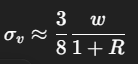  where w is the FWHM of the CCF peak (in velocity units), and R is their “Tonry–Davis R parameter” (a measure of peak height relative to antisymmetric noise in the CCF).  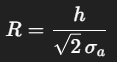  h = height of the CCF peak above baseline.  σₐ = rms of the antisymmetric part of the CCF (a proxy for the noise level).  (ie. R is like singal to noise of CCF peak)

In [13]:
# === Run ALL observations & BOTH arms: normalize → core-trim → CCF → Gaussian-fit → tables ===

# --- config ---
c_kms         = 299_792.458
wmin, wmax    = 4020.0, 7000.0
cont_width    = 501
edge_clip_A   = 8.0
rv_half_range = 200.0
guess_fwhm    = 15.0

def _sort_key(k):
    try: return int(k.split("_")[1])
    except: return k

def gaussian(x, amp, mu, fwhm, off):
    sigma = fwhm / (2*np.sqrt(2*np.log(2)))
    return amp * np.exp(-(x - mu)**2 / (2*sigma**2)) + off

# NaN-aware continuum normalization + "core"
_box = Box1DKernel(cont_width)
def normalize_and_core(lam, flux):
    lam = np.asarray(lam, float)
    fx  = np.asarray(flux, float)
    good = np.isfinite(lam) & np.isfinite(fx)
    lam, fx = lam[good], fx[good]

    sel = (lam >= wmin) & (lam <= wmax)
    lam, fx = lam[sel], fx[sel]
    if lam.size < 10:
        return lam, np.full_like(lam, np.nan)

    fx[fx == 0] = np.nan
    cont = convolve(
        np.clip(fx, np.nanpercentile(fx, 0.5), None),
        _box, boundary='extend',
        nan_treatment='interpolate',
        preserve_nan=True,
        normalize_kernel=True,
    )
    okc = np.isfinite(cont) & (cont > 0)
    cont[~okc] = np.nanmedian(cont[okc])
    fnorm = fx / cont

    core = (lam >= lam.min() + edge_clip_A) & (lam <= lam.max() - edge_clip_A)
    return lam[core], fnorm[core]

def clean_finite_unique(lam, flux):
    """Keep finite samples and enforce strictly increasing, unique λ."""
    m = np.isfinite(lam) & np.isfinite(flux)
    lam, flux = lam[m], flux[m]
    if lam.size == 0:
        return lam, flux
    # ensure increasing
    if lam[0] > lam[-1]:
        lam = lam[::-1]; flux = flux[::-1]
    # drop duplicate wavelengths
    lam_u, idx = np.unique(lam, return_index=True)
    return lam_u, flux[idx]

rows, skipped = [], []
normalised_data = []

all_keys = sorted(list(data_store.keys()), key=_sort_key)
print(f"Processing ALL observations: {len(all_keys)} total")

for obs_key in all_keys:
    print(f"\n=== {obs_key} ===")
    for arm in ["L", "U"]:
        wkey = f"wavelength_{arm}"
        fkey = f"flux_data_{arm}"
        if wkey not in data_store[obs_key] or fkey not in data_store[obs_key]:
            print(f"  Arm {arm}: not present, skipping.")
            continue

        wave = data_store[obs_key][wkey]
        flux = data_store[obs_key][fkey]

        # 1) Normalize observed and apply "core"
        lam_o, fnorm_o = normalize_and_core(wave, flux)
        if lam_o.size < 50:
            msg = "too few points after normalization+core"
            print(f"  Arm {arm}: {msg}")
            skipped.append((obs_key, arm, msg))
            continue

        # 2) RV-safe overlap against TEMPLATE (native grids)
        w_tpl = np.asarray(lam_t, float)
        f_tpl = np.asarray(fnorm_t, float)
        # template finite/unique
        w_tpl, f_tpl = clean_finite_unique(w_tpl, f_tpl)

        rvmin, rvmax = -rv_half_range, rv_half_range
        low_bound  = max(lam_o.min(), w_tpl.min() * (1.0 + rvmax / c_kms))
        high_bound = min(lam_o.max(), w_tpl.max() * (1.0 + rvmin / c_kms))

        keep = (lam_o >= low_bound) & (lam_o <= high_bound)
        lam_obs, f_obs = lam_o[keep], fnorm_o[keep]

        # 3) FINAL clean: finite + unique + increasing
        lam_obs, f_obs = clean_finite_unique(lam_obs, f_obs)

        # Diagnostics
        if lam_obs.size < 50 or high_bound <= low_bound:
            msg = (f"insufficient RV-safe overlap (N={lam_obs.size}, "
                   f"bounds=({low_bound:.1f},{high_bound:.1f}))")
            print(f"  Arm {arm}: {msg}")
            skipped.append((obs_key, arm, msg))
            continue

        # Keep the normalized (clean) spectrum
        normalised_data.append(pd.DataFrame({
            "Observation": obs_key, "Arm": arm,
            "wavelength_A": lam_obs, "flux_norm": f_obs
        }))

        # 4) Z-score AFTER cleaning
        s_obs = np.nanstd(f_obs)
        s_tpl = np.nanstd(f_tpl)
        if (s_obs == 0) or (s_tpl == 0):
            msg = f"zero variance after cleaning (s_obs={s_obs:.3g}, s_tpl={s_tpl:.3g})"
            print(f"  Arm {arm}: {msg}")
            skipped.append((obs_key, arm, msg))
            continue

        f_obs_z = (f_obs - np.nanmean(f_obs)) / s_obs
        f_tpl_z = (f_tpl - np.nanmean(f_tpl)) / s_tpl

        # 5) RV step from observed sampling
        dlam   = np.median(np.diff(lam_obs))
        if not np.isfinite(dlam) or dlam <= 0:
            msg = "bad dλ after cleaning"
            print(f"  Arm {arm}: {msg}")
            skipped.append((obs_key, arm, msg))
            continue
        wcen   = np.median(lam_obs)
        rvstep = dlam * c_kms / wcen

        safe_skip = max(0, min(lam_obs.size // 100, 50))

        # 6) Cross-correlation
        try:
            RV, CC = pyasl.crosscorrRV(lam_obs, f_obs_z, w_tpl, f_tpl_z,
                                       rvmin, rvmax, rvstep, skipedge=safe_skip)
        except Exception as e:
            msg = f"crosscorrRV failed: {e}"
            print(f"  Arm {arm}: {msg}")
            skipped.append((obs_key, arm, msg))
            continue

        if len(RV) < 5 or len(CC) != len(RV) or not np.isfinite(CC).any():
            msg = (f"invalid CCF arrays "
                   f"(Nobs={lam_obs.size}, Ntpl={w_tpl.size}, "
                   f"finite(CC)={np.isfinite(CC).sum()})")
            print(f"  Arm {arm}: {msg}")
            skipped.append((obs_key, arm, msg))
            continue

        # 7) Peak & Gaussian fit
        i0 = int(np.nanargmax(CC))
        mu0 = float(RV[i0])
        cc_peak = float(CC[i0])

        win = guess_fwhm
        sel_fit = (RV > mu0 - win) & (RV < mu0 + win)
        if sel_fit.sum() < 5:
            msg = "too few points in fit window"
            print(f"  Arm {arm}: {msg}")
            skipped.append((obs_key, arm, msg))
            continue

        x = RV[sel_fit]; y = CC[sel_fit]
        p0 = [y.max() - np.median(y), mu0, max(5.0, guess_fwhm), np.median(y)]
        bounds = ([0, mu0 - 2*win, 1.0, -np.inf],
                  [np.inf, mu0 + 2*win, 200.0,  np.inf])

        try:
            popt, pcov = curve_fit(gaussian, x, y, p0=p0, bounds=bounds, maxfev=20000)
            amp, mu_fit, fwhm_fit, off = popt
            perr = np.sqrt(np.diag(pcov)) if (pcov is not None and np.all(np.isfinite(pcov))) else [np.nan]*4
            amp_err, mu_err, fwhm_err, off_err = perr
        except Exception as e:
            msg = f"fit failed: {e}"
            print(f"  Arm {arm}: {msg}")
            skipped.append((obs_key, arm, msg))
            continue

        # --- Tonry–Davis (1979) error on RV (uses fitted FWHM and antisymmetric CCF noise) ---
        fwhm_kms = float(fwhm_fit)
        amp_peak = max(float(amp), 0.0)
        # antisymmetric noise (exclude region around peak)
        win_antisym = max(2.0 * guess_fwhm, 20.0)
        resid_antisym = 0.5 * (CC - CC[::-1])
        mask_noise = (RV < mu0 - win_antisym) | (RV > mu0 + win_antisym)
        if np.isfinite(resid_antisym).sum() < 10:
            sigma_a = np.nan
        else:
            sigma_a = np.nanstd(resid_antisym[mask_noise]) if mask_noise.sum() > 10 else np.nanstd(resid_antisym)
        if (sigma_a is not None) and np.isfinite(sigma_a) and (sigma_a > 0):
            R_td = amp_peak / (np.sqrt(2.0) * sigma_a)
            RV_td_err_kms = (3.0/8.0) * fwhm_kms / (1.0 + R_td)
        else:
            R_td = np.nan
            RV_td_err_kms = np.nan
        # --- end Tonry–Davis block ---

        rows.append({
            "Observation": obs_key,
            "Arm": arm,
            "N_used": int(lam_obs.size),
            "RV_grid_kms": mu0,
            "RV_gaussian_kms": float(mu_fit),
            "RV_err_kms": float(mu_err),            # Gaussian-fit centroid error
            "RV_td_err_kms": float(RV_td_err_kms),  # Tonry–Davis error (new)
            "TD_R": float(R_td),                    # Tonry–Davis R parameter (diagnostic)
            "FWHM_kms": float(fwhm_fit),
            "FWHM_err_kms": float(fwhm_err),
            "CC_peak": cc_peak,
            "rvstep_kms": float(rvstep),
            "skipedge": int(safe_skip)
        })

# Per-arm results table
rv_table = pd.DataFrame(rows).sort_values(["Observation", "Arm"]).reset_index(drop=True)
display(rv_table)

# Error-weighted average per observation (NOW USING TONRY–DAVIS ERRORS)
def _weighted_mean(group):
    rv = group["RV_gaussian_kms"].to_numpy()
    er = group["RV_td_err_kms"].to_numpy()     # switched to Tonry–Davis errors
    good = np.isfinite(rv) & np.isfinite(er) & (er > 0)
    if good.sum() == 0:
        return pd.Series({"RV_avg_kms": np.nan, "RV_avg_err_kms": np.nan})
    w = 1.0 / (er[good]**2)
    return pd.Series({
        "RV_avg_kms": np.sum(rv[good] * w) / np.sum(w),
        "RV_avg_err_kms": np.sqrt(1.0 / np.sum(w))
    })

if not rv_table.empty:
    rv_avg_table = rv_table.groupby("Observation", as_index=False).apply(_weighted_mean)
    display(rv_avg_table)

# Optional: list any skips
if skipped:
    print("\nSkipped entries:")
    for obs_key, arm, reason in skipped:
        print(f"  {obs_key} arm {arm}: {reason}")

print('TD_R is the Tonry–Davis R parameter, RV_td_err_kms is the Tonry–Davis error on RV (final error)')


Processing ALL observations: 2 total

=== Obs_6 ===

=== Obs_7 ===


Observation Arm  N_used  RV_grid_kms  RV_gaussian_kms  RV_err_kms  \
0       Obs_6   L   34101    76.869308        77.789891    0.049079   
1       Obs_6   U   28668    77.943962        78.149098    0.163757   
2       Obs_7   L   34125    76.679920        77.004237    0.036940   
3       Obs_7   U   28566    75.701797        75.624109    0.203518   

   RV_td_err_kms      TD_R   FWHM_kms  FWHM_err_kms      CC_peak  rvstep_kms  \
0       1.418113  3.443113  16.802232      0.346425  7838.632083    1.628643   
1       4.261453  0.662659  18.894243      1.660909  3168.576662    1.615953   
2       1.316791  3.772375  16.757918      0.269397  8273.342213    1.627529   
3       3.839161  0.958196  20.047550      2.412847  1984.393865    1.621775   

   skipedge  
0        50  
1        50  
2        50  
3        50

/tmp/ipykernel_3162/1006028394.py:240: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  rv_avg_table = rv_table.groupby("Observation", as_index=False).apply(_weighted_mean)


Observation  RV_avg_kms  RV_avg_err_kms
0       Obs_6   77.825704        1.345565
1       Obs_7   76.858966        1.245562

TD_R is the Tonry–Davis R parameter, RV_td_err_kms is the Tonry–Davis error on RV (final error)


Get star 1's average velocity and error from table above:  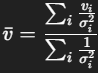  and error = 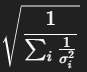

In [14]:
# ==ONNLY FOR STAR 1 -= average Star RV from per-observation results ===
m = (np.isfinite(rv_avg_table["RV_avg_kms"]) &
     np.isfinite(rv_avg_table["RV_avg_err_kms"]) &
     (rv_avg_table["RV_avg_err_kms"] > 0))

rv = rv_avg_table.loc[m, "RV_avg_kms"].to_numpy()
er = rv_avg_table.loc[m, "RV_avg_err_kms"].to_numpy()

w = 1.0 / (er**2)
vbar = np.sum(w * rv) / np.sum(w) if w.size else np.nan
vstat = np.sqrt(1.0 / np.sum(w)) if w.size else np.nan

print(f"Star 1 RV : {vbar:.3f} ± {vstat:.3f} km s⁻¹")

Star 1 RV : 77.305 ± 0.914 km s⁻¹


In [15]:
#  RV correct Observations 

# Make a lookup dict: {obs_key: RV_avg}
rv_lookup = dict(zip(rv_avg_table["Observation"], rv_avg_table["RV_avg_kms"]))

rv_corrected_data = []  # new list of DataFrames with shifted wavelengths

for df in normalised_data:
    obs = df["Observation"].iloc[0]
    arm = df["Arm"].iloc[0]
    lam = df["wavelength_A"].to_numpy().copy()
    fn  = df["flux_norm"].to_numpy().copy()

    # RV for this observation
    rv = rv_lookup.get(obs, 0.0)  # default 0 if missing
    
    # non-relativistic shift: λ_rest = λ_obs / (1 + v/c)
    lam_rest = lam / (1.0 + rv / c_kms)

    # build new DataFrame
    rv_corrected_data.append(
        pd.DataFrame({"Observation": obs,"Arm": arm,"wavelength_rest_A": lam_rest,"flux_norm": fn}))

print(f"Shifted {len(rv_corrected_data)} spectra into rest frame.")

Shifted 4 spectra into rest frame.


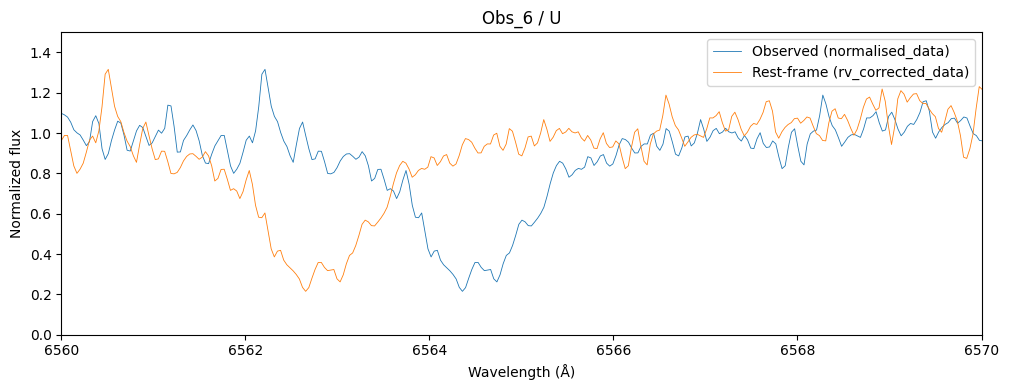

In [16]:
#  chekc the frist spectra shift from normalised_data to rv_corrected_data

# Grab the first spectrum
df_obs = normalised_data[1]
df_rest = rv_corrected_data[1]

lam_obs  = df_obs["wavelength_A"].to_numpy()
flux_obs = df_obs["flux_norm"].to_numpy()

lam_rest = df_rest["wavelength_rest_A"].to_numpy()
flux_rest= df_rest["flux_norm"].to_numpy()

plt.figure(figsize=(10,4))
plt.plot(lam_obs, flux_obs, lw=0.6, label="Observed (normalised_data)")
plt.plot(lam_rest, flux_rest, lw=0.6, label="Rest-frame (rv_corrected_data)")
plt.xlabel("Wavelength (Å)")
plt.ylabel("Normalized flux")
plt.title(f"{df_obs['Observation'].iloc[0]} / {df_obs['Arm'].iloc[0]}")
plt.legend()
plt.tight_layout()
plt.xlim(6560,6570)
plt.ylim(0, 1.5)
plt.show()


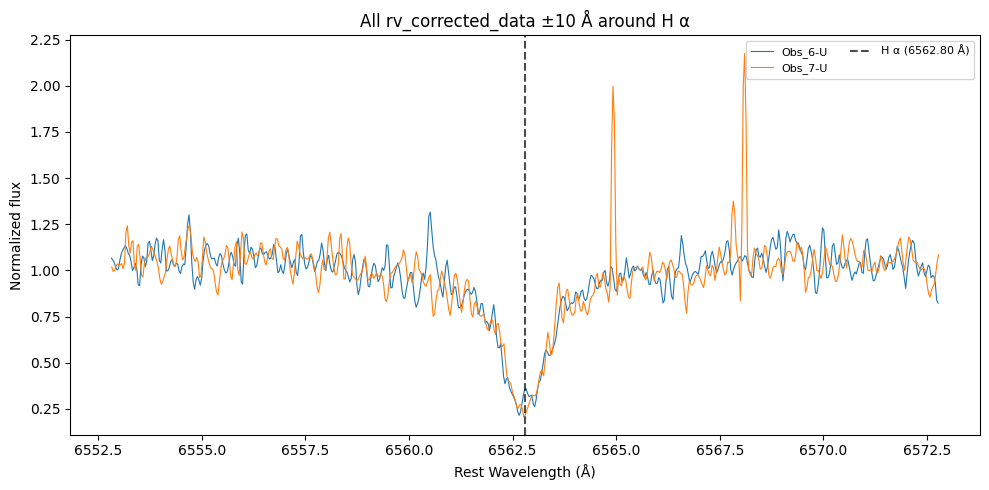

In [17]:
# pick which line to plot
line_label = "H α"
width = 10  # Å window

# get the wavelength from the spectral_lines DataFrame
row = spectral_lines.query("Label == @line_label").iloc[0]
lam0 = row["Wavelength"]

plt.figure(figsize=(10,5))

for df in rv_corrected_data:
    obs  = df["Observation"].iloc[0]
    arm  = df["Arm"].iloc[0]
    lam  = df["wavelength_rest_A"].to_numpy()
    flux = df["flux_norm"].to_numpy()
    
    # select ±width Å window
    mask = (lam >= lam0 - width) & (lam <= lam0 + width)
    if mask.sum() == 0:
        continue
    
    plt.plot(lam[mask], flux[mask], lw=0.8, label=f"{obs}-{arm}")

plt.axvline(lam0, color="k", ls="--", alpha=0.7, label=f"{line_label} ({lam0:.2f} Å)")
plt.xlabel("Rest Wavelength (Å)")
plt.ylabel("Normalized flux")
plt.title(f"All rv_corrected_data ±{width} Å around {line_label}")
plt.legend(fontsize=8, ncol=2)
plt.tight_layout()
plt.show()


Native sampling ≈ 1.63 km/s/pix
Log grid: 64974 pixels, step = 5.43e-06 (≈ 1.63 km/s)


/tmp/ipykernel_3162/974392554.py:43: RuntimeWarning: Mean of empty slice
  mean_flux_L = np.nanmean(flux_L, axis=0)
/usr/lib/python3/dist-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/tmp/ipykernel_3162/974392554.py:46: RuntimeWarning: Mean of empty slice
  mean_flux_U = np.nanmean(flux_U, axis=0)


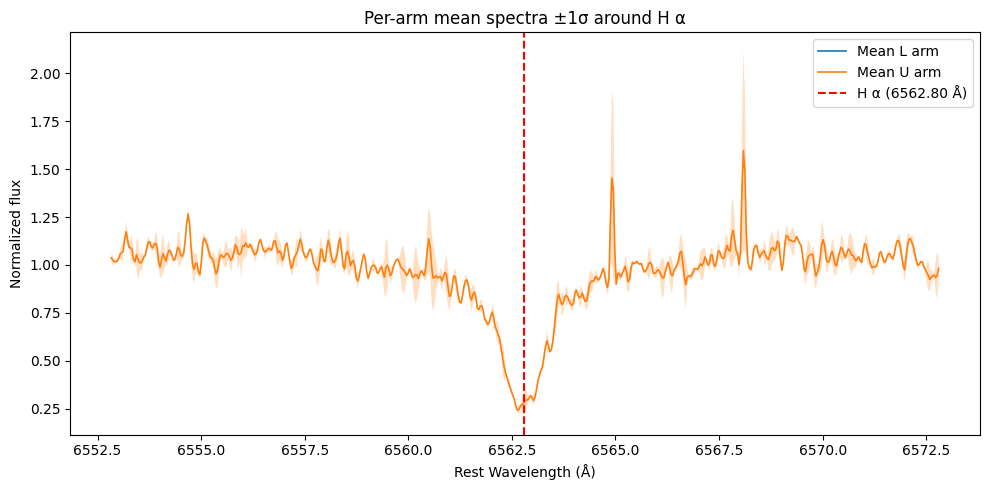

In [18]:
# RE-grid the data
# so that each observation has the same wavelength grid  (up to now the flux's are recorded at slightly different lambda)

# --- Step 1. Compute native resolution from one of your spectra ---
# grab first spectrum as reference (say L-arm of Obs_1)
ref_df = rv_corrected_data[0]   # pick first dataframe
lam_ref = ref_df["wavelength_rest_A"].to_numpy()

# estimate pixel scale at mid-spectrum
dlam   = np.median(np.diff(lam_ref))
lam_mid= np.median(lam_ref)
dv_pix = 299792.458 * dlam / lam_mid   # km/s per pixel
print(f"Native sampling ≈ {dv_pix:.2f} km/s/pix")

# --- Step 2. Build log-lambda grid with the same sampling ---
# Convert velocity step to log-lambda step
dloglam = dv_pix / 299792.458   # Δlnλ corresponding to native dv_pix

lam_min = min(df["wavelength_rest_A"].min() for df in rv_corrected_data)
lam_max = max(df["wavelength_rest_A"].max() for df in rv_corrected_data)

loglam_grid = np.arange(np.log(lam_min), np.log(lam_max), dloglam)
lam_grid    = np.exp(loglam_grid)

print(f"Log grid: {len(lam_grid)} pixels, step = {dloglam:.2e} (≈ {dv_pix:.2f} km/s)")

# --- Step 3. Regrid all spectra ---
flux_interp = []
for df in rv_corrected_data:
    lam  = df["wavelength_rest_A"].to_numpy()
    flux = df["flux_norm"].to_numpy()
    interp_flux = np.interp(lam_grid, lam, flux, left=np.nan, right=np.nan)
    flux_interp.append(interp_flux)

flux_interp = np.array(flux_interp)   # shape = (n_obs, n_pixels)

# --- Step 4. Compute per-arm mean and error envelope (keep arms separate) ---
# Assumes order [L1, U1, L2, U2, ...]
assert flux_interp.shape[0] % 2 == 0, "Expected even number of rows: [L1,U1,L2,U2,...]"
flux_L = flux_interp[0::2]
flux_U = flux_interp[1::2]

mean_flux_L = np.nanmean(flux_L, axis=0)
std_flux_L  = np.nanstd(flux_L, axis=0)

mean_flux_U = np.nanmean(flux_U, axis=0)
std_flux_U  = np.nanstd(flux_U, axis=0)

# --- Step 5. Plot around a line of interest ---
import matplotlib.pyplot as plt

line_label = "H α"
width = 10  # Å

lam0 = spectral_lines.query("Label == @line_label")["Wavelength"].iloc[0]
mask = (lam_grid >= lam0 - width) & (lam_grid <= lam0 + width)

plt.figure(figsize=(10,5))
plt.plot(lam_grid[mask], mean_flux_L[mask], lw=1.2, label="Mean L arm")
plt.fill_between(lam_grid[mask],
                 (mean_flux_L - std_flux_L)[mask],
                 (mean_flux_L + std_flux_L)[mask],
                 alpha=0.25)

plt.plot(lam_grid[mask], mean_flux_U[mask], lw=1.2, label="Mean U arm")
plt.fill_between(lam_grid[mask],
                 (mean_flux_U - std_flux_U)[mask],
                 (mean_flux_U + std_flux_U)[mask],
                 alpha=0.25)

plt.axvline(lam0, color="r", ls="--", label=f"{line_label} ({lam0:.2f} Å)")
plt.xlabel("Rest Wavelength (Å)")
plt.ylabel("Normalized flux")
plt.title(f"Per-arm mean spectra ±1σ around {line_label}")
plt.legend()
plt.tight_layout()
plt.show()


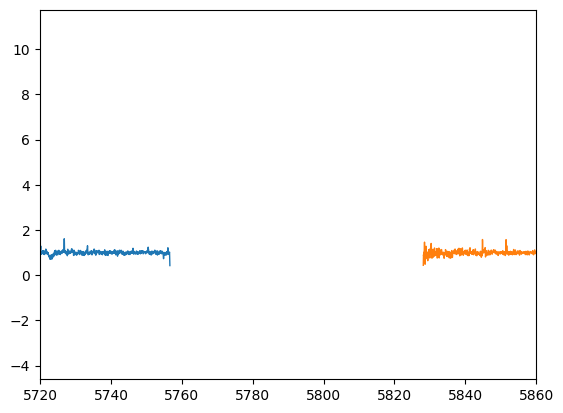

In [19]:
# PLOT BOTH MEANS SEPARATELY JUST SO YOU CAN SEE THEY ARE SEPERATE
plt.xlim(5720,5860)
plt.plot(lam_grid, mean_flux_L, lw=1.0, label="L arm")
plt.plot(lam_grid, mean_flux_U, lw=1.0, label="U arm")

In [20]:
# SAVE MEAN SPECTRUM AS A FITS FILE

from astropy.io import fits
from astropy.table import Table

# Combined table (both arms)
tab = Table(
    [lam_grid, mean_flux_L, mean_flux_U],
    names=["wavelength_A", "flux_mean_L", "flux_mean_U"]
)

hdr = fits.Header()
hdr["EXTNAME"] = "SPECTRUM"
hdr["XUNIT"]   = "Angstrom"
hdr["BUNIT"]   = "relative"
hdr["GRIDDESC"]= "log-lambda grid, constant dloglam"
hdr["DLOGLAM"] = (float(dloglam), "log(lambda) step")
hdr["DVPIX"]   = (float(dv_pix), "km/s per pixel (approx)")
hdr["LAMMIN"]  = float(lam_grid.min())
hdr["LAMMAX"]  = float(lam_grid.max())

# Write combined file
fits.HDUList([
    fits.PrimaryHDU(),
    fits.BinTableHDU(tab, header=hdr, name="SPECTRUM")
]).writeto("mean_spectrum_botharms.fits", overwrite=True)

# Write L-arm only
tab_L = Table([lam_grid, mean_flux_L], names=["wavelength_A", "flux_mean"])
fits.HDUList([
    fits.PrimaryHDU(),
    fits.BinTableHDU(tab_L, header=hdr, name="SPECTRUM")
]).writeto("mean_spectrum_L.fits", overwrite=True)

# Write U-arm only
tab_U = Table([lam_grid, mean_flux_U], names=["wavelength_A", "flux_mean"])
fits.HDUList([
    fits.PrimaryHDU(),
    fits.BinTableHDU(tab_U, header=hdr, name="SPECTRUM")
]).writeto("mean_spectrum_U.fits", overwrite=True)

print("Wrote mean_spectrum_botharms.fits, mean_spectrum_L.fits, mean_spectrum_U.fits")

Wrote mean_spectrum_botharms.fits, mean_spectrum_L.fits, mean_spectrum_U.fits


Filename: mean_spectrum_botharms.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1  SPECTRUM      1 BinTableHDU     22   64974R x 3C   [D, D, D]   
XTENSION= 'BINTABLE'           / binary table extension                         BITPIX  =                    8 / array data type                                NAXIS   =                    2 / number of array dimensions                     NAXIS1  =                   24 / length of dimension 1                          NAXIS2  =                64974 / length of dimension 2                          PCOUNT  =                    0 / number of group parameters                     GCOUNT  =                    1 / number of groups                               TFIELDS =                    3 / number of table fields                         EXTNAME = 'SPECTRUM'                                                            XUNIT   = 'Angstrom'                                        

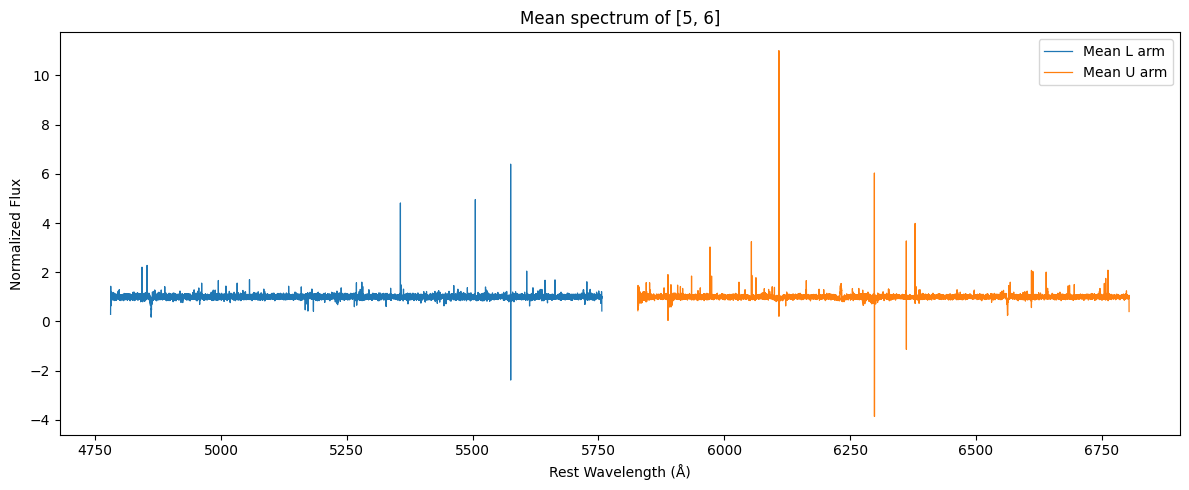

In [21]:
# --- OPEN saved FITS file and plot both arms cleanly ---
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt

fname = "mean_spectrum_botharms.fits"

with fits.open(fname) as hdul:
    hdul.info()
    data   = hdul["SPECTRUM"].data
    header = hdul["SPECTRUM"].header

lam = data["wavelength_A"]

plt.figure(figsize=(12, 5))

# Handle either single-column (old) or per-arm (new) files
if "flux_mean" in data.columns.names:
    flux = data["flux_mean"]
    print(header)
    print(f"Wavelength range: {np.nanmin(lam):.3f} – {np.nanmax(lam):.3f}")
    print(f"Flux range: {np.nanmin(flux):.3f} – {np.nanmax(flux):.3f}")
    plt.plot(lam, flux, lw=0.8, label="Mean (both arms)")

else:
    flux_L = data["flux_mean_L"]
    flux_U = data["flux_mean_U"]
    print(header)

    goodL = np.isfinite(flux_L)
    goodU = np.isfinite(flux_U)

    # wavelength coverage for each arm separately
    lamL_min, lamL_max = lam[goodL].min(), lam[goodL].max() if goodL.any() else (np.nan, np.nan)
    lamU_min, lamU_max = lam[goodU].min(), lam[goodU].max() if goodU.any() else (np.nan, np.nan)

    print(f"L-arm wavelength range: {lamL_min:.3f} – {lamL_max:.3f} Å")
    print(f"U-arm wavelength range: {lamU_min:.3f} – {lamU_max:.3f} Å")

    if goodL.any():
        print(f"L-arm flux range: {np.nanmin(flux_L[goodL]):.3f} – {np.nanmax(flux_L[goodL]):.3f}")
        plt.plot(lam[goodL], flux_L[goodL], lw=0.9, label="Mean L arm")

    if goodU.any():
        print(f"U-arm flux range: {np.nanmin(flux_U[goodU]):.3f} – {np.nanmax(flux_U[goodU]):.3f}")
        plt.plot(lam[goodU], flux_U[goodU], lw=0.9, label="Mean U arm")

plt.xlabel("Rest Wavelength (Å)")
plt.ylabel("Normalized Flux")
plt.title(f"Mean spectrum of {star_obs}")
plt.legend()
plt.tight_layout()
plt.show()



In [22]:
# SAVE as a .FITS AGAIN  BUT    AS A flux array as the primary image--- so it is  sline7-friendly ---- L/U FITS on a linear λ grid ---

from scipy.interpolate import interp1d  # if not available, use np.interp

# Inputs you already have:
lam = np.asarray(lam_grid, float).reshape(-1)         # Angstrom
fluxL = np.asarray(mean_flux_L, float).reshape(-1)
fluxU = np.asarray(mean_flux_U, float).reshape(-1)

# 1) Build a linear-λ grid (UVES-like) using median Δλ
dlam_med = float(np.median(np.diff(lam)))
lam_min, lam_max = float(lam.min()), float(lam.max())
lam_lin = np.arange(lam_min, lam_max, dlam_med, dtype=float)

# 2) Interpolate your log-λ sampled spectra onto the linear grid
# (use 'linear' interp; fill NaN outside range just in case)
fL = interp1d(lam, fluxL, kind="linear", bounds_error=False, fill_value=np.nan)(lam_lin)
fU = interp1d(lam, fluxU, kind="linear", bounds_error=False, fill_value=np.nan)(lam_lin)

def write_sline7_fits(outname, flux_lin, lam_lin):
    hdu0 = fits.PrimaryHDU(np.asarray(flux_lin, np.float32))
    # Provide linear WCS for wavelength
    hdr = hdu0.header
    hdr["CRVAL1"] = (lam_lin[0], "Wavelength at pixel 1 [A]")
    hdr["CDELT1"] = (lam_lin[1]-lam_lin[0], "Delta wavelength per pixel [A]")
    hdr["CUNIT1"] = ("Angstrom", "Wavelength unit")
    hdr["BUNIT"]  = ("relative", "Normalized flux")
    # Optional: also store the exact λ array in EXT 1 for reference
    hdu1 = fits.ImageHDU(np.asarray(lam_lin, np.float64), name="WAVE")
    fits.HDUList([hdu0, hdu1]).writeto(outname, overwrite=True)

write_sline7_fits("mean_spectrum_L_s7.fits", fL, lam_lin)
write_sline7_fits("mean_spectrum_U_s7.fits", fU, lam_lin)

print("Wrote mean_spectrum_L_s7.fits and mean_spectrum_U_s7.fits")


Wrote mean_spectrum_L_s7.fits and mean_spectrum_U_s7.fits


In [23]:
# === Check wavelength range of the newly written FITS spectra ===
from astropy.io import fits

def print_lambda_range(fname):
    """Print the start, end and step of the wavelength grid for a FITS file."""
    with fits.open(fname) as hdul:
        h = hdul[0].header
        npts = h["NAXIS1"]
        crval = h["CRVAL1"]
        cdelt = h.get("CDELT1", h.get("CD1_1"))
        lam1 = crval
        lam2 = crval + cdelt * (npts - 1)
        print(f"{fname}:")
        print(f"  λ_start = {lam1:.2f} Å")
        print(f"  λ_end   = {lam2:.2f} Å")
        print(f"  step    = {cdelt:.6f} Å/pix")
        print(f"  points  = {npts}")
        print("-" * 60)

# Run for both arms
print_lambda_range("mean_spectrum_L_s7.fits")
print_lambda_range("mean_spectrum_U_s7.fits")


mean_spectrum_L_s7.fits:
  λ_start = 4780.59 Å
  λ_end   = 6804.14 Å
  step    = 0.030984 Å/pix
  points  = 65311
------------------------------------------------------------
mean_spectrum_U_s7.fits:
  λ_start = 4780.59 Å
  λ_end   = 6804.14 Å
  step    = 0.030984 Å/pix
  points  = 65311
------------------------------------------------------------


DIFF SECTION   -  NOW  compare multiple  syn spectra to the OBSERVED  to  UNDERSTAND   best fitting syn spectra  - ie. best fitting Metalicity

In [24]:
###DIFF SECTION   -  NOW  compare multiple  syn spectra to the OBSERVED  to  UNDERSTAND   best fitting syn spectra  - ie. best fitting Metalicity

#LOAD ALL synthetic spectrums   -   NB.  THESE are normalised (simply load column 1 from .syn file) but they NEED TO BE REGRIDDED TO the observed spec BEFORE cross-correlation

from pathlib import Path

# SYN_DIR  = Path("/home/scotdevlin/jupyter")
SYN_DIR = Path("/home/scotdevlin/spec_analysis/K2/K2/tutorial")

# CHOOSE which Synthetic spectra:
if star_obs == [0, 1, 2, 3]:
    # star 1
    FILE_TPL = "{token}t5507g346k200_cl_ap04_4500_7000_R40000.syn"
    TOKENS = [f"am{v:03d}" for v in range(150, 331, 10)]

elif star_obs == [5, 6, 7, 8, 10, 12, 13]:
    # star 2
    FILE_TPL = "{token}t6183g405k200_cl_ap04_4500_7000_R40000.syn"
    TOKENS = (
        [f"am{v:03d}" for v in range(150, 301, 10)]
        + [f"am{v:03d}" for v in range(301, 351, 1)]
        )
else:
    raise ValueError(f"Unknown star_obs: {star_obs}")


synthetics, missing = [], []

for tok in TOKENS:
    fpath = SYN_DIR / FILE_TPL.format(token=tok)
    if not fpath.exists():
        missing.append(fpath)
        continue

    # inline load: col0 = λ [Å], col1 = normalized flux     -  these are the coloumns in the .syn file  nb that col1 is already normalised :-)
    arr   = np.genfromtxt(fpath, comments="#")
    lam   = arr[:, 0]
    fnorm = arr[:, 1]

    # inline Fe/H from token, e.g. 'am220' -> -2.20
    feh = -int(tok[2:]) / 100.0

    synthetics.append({
        "token": tok,
        "feh": feh,
        "path": str(fpath),
        "lam": lam,
        "flux": fnorm,
    })

print(f"Requested: {len(TOKENS)} files")
print(f"Loaded   : {len(synthetics)} files")
if missing:
    print("Missing:")
    for p in missing:
        print("  -", p.name)

# set defaults for plotting/overlay if anything loaded
if synthetics:
    chosen  = synthetics[0]
    lam_t   = chosen["lam"]
    fnorm_t = chosen["flux"]
    syn_path = chosen["path"]
    print(f"\nDefault template: {chosen['token']}  [Fe/H]={chosen['feh']:+.2f}")
else:
    print("No templates loaded; check SYN_DIR and filenames.")


ValueError: Unknown star_obs: [5, 6]

In [ ]:
#  this cell PREPS for CCF by  (1) REGRIDS SYN spectra  (2) trims regridded syn spectra AND trims obs  -  making sure no 0's or NAN values

#  z-score so baseline/scale don't matter:    Removes continuum/baseline differences: ensures that only relative line shapes drive the correlation, not offsets (e.g. one spectrum being ~0.95 everywhere and the other ~1.05). AND   Normalizes scale: both arrays have variance = 1, so the cross-correlation amplitude is comparable between different templates.
def zscore1d(x):
    x = x.astype(float)
    m = np.nanmean(x); s = np.nanstd(x)
    return (x - m) / (s if s else 1.0)

cc_inputs_per_synth = {}   # create a dictionary to hold cross-correlation inputs per synthetic template - SO INCLUDES OBS -  see last 3 line chunk for whats in it 

for s in synthetics:
    name   = s["token"]         # e.g., "am220"
    lam_t  = s["lam"]           # template/synthetic wavelengths
    fnorm_t= s["flux"]          # normalized template/synthetic flux

    # REGRID synthetic to observed grid
    syn_regrided = np.interp(lam_grid, lam_t, fnorm_t, left=np.nan, right=np.nan)

    # AUTO Masks per arm: finds the finite AND non-zero on both obs and template
    # mask_L = np.isfinite(mean_flux_L) & (mean_flux_L != 0) & np.isfinite(syn_regrided) & (syn_regrided != 0)
    # mask_U = np.isfinite(mean_flux_U) & (mean_flux_U != 0) & np.isfinite(syn_regrided) & (syn_regrided != 0)
    mask_L = np.isfinite(mean_flux_L) & (mean_flux_L != 0) & np.isfinite(syn_regrided)
    mask_U = np.isfinite(mean_flux_U) & (mean_flux_U != 0) & np.isfinite(syn_regrided)

    # Trim DOWN the observed and synthetic spectra to only MASKED regions
    obs_trimd_L = mean_flux_L[mask_L]
    syn_trimd_L = syn_regrided[mask_L]
    obs_trimd_U = mean_flux_U[mask_U]
    syn_trimd_U = syn_regrided[mask_U]

    # Z-score    -    z-score so baseline/scale don't matter:    Removes continuum/baseline differences: ensures that only relative line shapes drive the correlation, not offsets (e.g. one spectrum being ~0.95 everywhere and the other ~1.05). AND   Normalizes scale: both arrays have variance = 1, so the cross-correlation amplitude is comparable between different templates.
    obs_trimd_L = zscore1d(obs_trimd_L); syn_trimd_L = zscore1d(syn_trimd_L)
    obs_trimd_U = zscore1d(obs_trimd_U); syn_trimd_U = zscore1d(syn_trimd_U)

    # Store for downstream CCF
    cc_inputs_per_synth[name] = {
        "L": {"mask": mask_L, "obs": obs_trimd_L, "tpl": syn_trimd_L},
        "U": {"mask": mask_U, "obs": obs_trimd_U, "tpl": syn_trimd_U},
        "meta": {"feh": s.get("feh"), "path": s.get("path")},
    }

print(f"Prepared CCF inputs for {len(cc_inputs_per_synth)} templates (per arm).")


Prepared CCF inputs for 19 templates (per arm).


Template: am220  [Fe/H]=-2.2  Arm: L
obs_trimd:
  length: 34325
  mean: -6.562040706072884e-16
  std : 1.0

syn_regrided_trimd:
  length: 34325
  mean: -1.2469947385925253e-15
  std : 0.9999999999999999


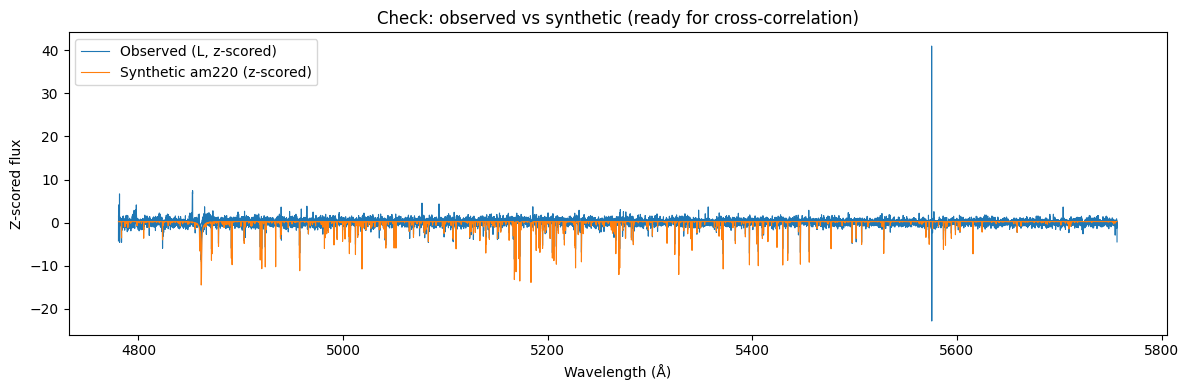

In [ ]:
# EYE BALL CHECK the synth and 
# --- choose which template and arm to inspect ---
token = "am220"   # <-- pick one from cc_inputs_per_synth.keys()
arm   = "L"       # "L" or "U"

# Fetch packed vectors from your prepared dict
if token not in cc_inputs_per_synth:
    raise KeyError(f"Token '{token}' not found. Available keys include: {list(cc_inputs_per_synth.keys())[:8]} ...")

pack = cc_inputs_per_synth[token][arm]
obs_trimd            = pack["obs"]            # z-scored observed (per arm)
syn_regrided_trimd   = pack["tpl"]            # z-scored template (per arm)
mask                 = pack["mask"]           # boolean mask on lam_grid
lam_sel              = lam_grid[mask]

# the raw per-arm mean (not z-scored)
raw_full = mean_flux_L if arm == "L" else mean_flux_U
# raw = raw_full

# (optional) print some meta
meta = cc_inputs_per_synth[token].get("meta", {})
print(f"Template: {token}  [Fe/H]={meta.get('feh')}  Arm: {arm}")

# Stats
print("obs_trimd:")
print("  length:", obs_trimd.size)
print("  mean:", np.nanmean(obs_trimd))
print("  std :", np.nanstd(obs_trimd))

print("\nsyn_regrided_trimd:")
print("  length:", syn_regrided_trimd.size)
print("  mean:", np.nanmean(syn_regrided_trimd))
print("  std :", np.nanstd(syn_regrided_trimd))

# Sanity checks
assert obs_trimd.size == syn_regrided_trimd.size == lam_sel.size, "Length mismatch!"

# Quick overlay
plt.figure(figsize=(12,4))
plt.plot(lam_sel, obs_trimd, lw=0.8, label=f"Observed ({arm}, z-scored)")
plt.plot(lam_sel, syn_regrided_trimd, lw=0.8, label=f"Synthetic {token} (z-scored)")
plt.xlabel("Wavelength (Å)"), plt.ylabel("Z-scored flux")
plt.title("Check: observed vs synthetic (ready for cross-correlation)")
# plt.xlim(4770, 4850)
plt.legend(); plt.tight_layout(); plt.show()




In [ ]:
## CROSS CORRELATE ALL SYNTH SPECTRUMS with masked, z-scored per-arm observed means you prepared,

token  feh arm  rv_at_peak_kms   CC_peak  rv_gauss_kms  rv_gauss_err_kms  \
0   am190 -1.9   L             0.0  0.649163      0.059456          0.028019   
1   am180 -1.8   L             0.0  0.649016      0.071191          0.029747   
2   am200 -2.0   L             0.0  0.647658      0.047339          0.026249   
3   am170 -1.7   L             0.0  0.647308      0.082351          0.031368   
4   am210 -2.1   L             0.0  0.644410      0.034879          0.024432   
5   am160 -1.6   L             0.0  0.644113      0.093298          0.032940   
6   am150 -1.5   L             0.0  0.639586      0.103832          0.034434   
7   am220 -2.2   L             0.0  0.639421      0.022229          0.022618   
8   am230 -2.3   L             0.0  0.632615      0.009427          0.020830   
9   am240 -2.4   L             0.0  0.624029     -0.003177          0.019166   
10  am250 -2.5   L             0.0  0.613760     -0.015224          0.017709   
11  am260 -2.6   L             0.0  0.601835     -0.026424          0.016537   
12  am270 -2.7   L             0.0  0.588581     -0.036140          0.015727   
13  am280 -2.8   L             0.0  0.573442     -0.044254          0.015266   
14  am290 -2.9   L             0.0  0.557621     -0.049840          0.015151   
15  am300 -3.0   L             0.0  0.540346     -0.052589          0.015310   
16  am310 -3.1   L             0.0  0.521616     -0.052023          0.015693   
17  am320 -3.2   L             0.0  0.502892     -0.047849          0.016265   
18  am330 -3.3   L             0.0  0.483202     -0.039833          0.017084   
19  am220 -2.2   U             0.0  0.323422     -0.198700          0.025701   
20  am210 -2.1   U             0.0  0.323262     -0.218763          0.026767   
21  am230 -2.3   U             0.0  0.322648     -0.179800          0.024158   
22  am200 -2.0   U             0.0  0.322108     -0.240550          0.027258   
23  am240 -2.4   U             0.0  0.321059     -0.161748          0.022313   
24  am190 -1.9   U             0.0  0.319907     -0.264282          0.027138   
25  am250 -2.5   U             0.0  0.318773     -0.144665          0.020529   
26  am180 -1.8   U             0.0  0.316584     -0.290817          0.026462   
27  am260 -2.6   U             0.0  0.315949     -0.127549          0.019220   
28  am270 -2.7   U             0.0  0.312764     -0.111054          0.018892   
29  am170 -1.7   U             0.0  0.312272     -0.319603          0.025431   
30  am280 -2.8   U             0.0  0.309199     -0.094396          0.019877   
31  am160 -1.6   U             0.0  0.306868     -0.352035          0.024293   
32  am290 -2.9   U             0.0  0.305687     -0.077645          0.022076   
33  am300 -3.0   U             0.0  0.302078     -0.060999          0.025277   
34  am150 -1.5   U             0.0  0.300534     -0.387491          0.023578   
35  am310 -3.1   U             0.0  0.298400     -0.043506          0.029137   
36  am320 -3.2   U             0.0  0.294935     -0.026034          0.033126   
37  am330 -3.3   U             0.0  0.291464     -0.007172          0.037332   

     fwhm_kms  fwhm_err_kms  n_points  
0   14.084919      0.141718     34325  
1   14.104087      0.150841     34325  
2   14.072152      0.132544     34325  
3   14.128237      0.159574     34325  
4   14.066752      0.123280     34325  
5   14.157982      0.168237     34325  
6   14.192108      0.176670     34325  
7   14.069254      0.114169     34325  
8   14.080121      0.105300     34325  
9   14.099863      0.097144     34325  
10  14.128802      0.090113     34325  
11  14.167186      0.084583     34325  
12  14.214324      0.080958     34325  
13  14.272736      0.079209     34325  
14  14.338268      0.079317     34325  
15  14.414377      0.080988     34325  
16  14.501957      0.084016     34325  
17  14.595137      0.088206     34325  
18  14.699571      0.094002     34325  
19  14.554303      0.138436     28605  
20  14.473189      0.142543     28605  
21 

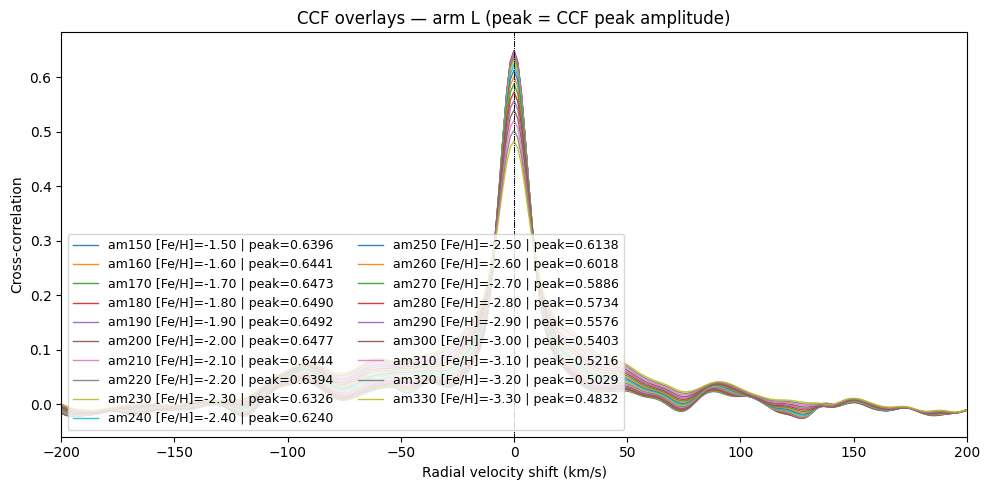

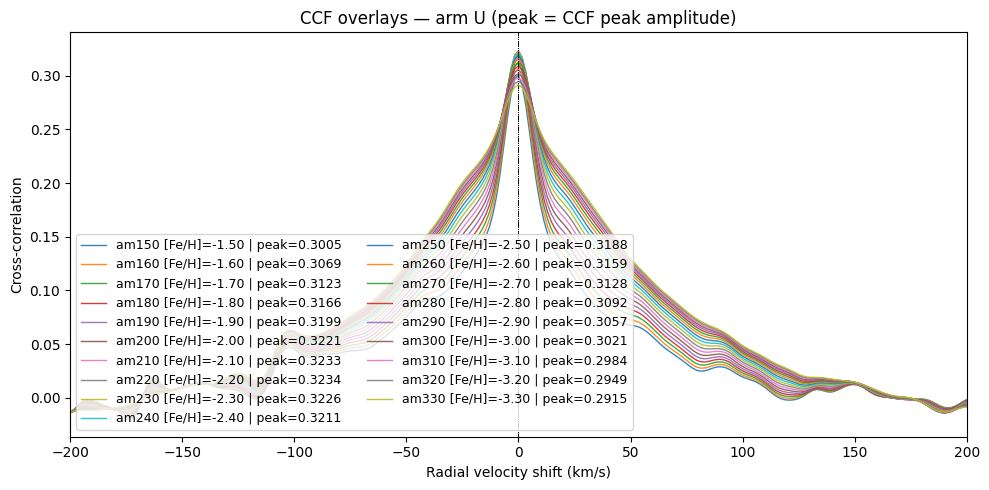


Best fitting synthetic spectrum to the observed data per arm (by grid peak - ie. the Fe/H of the best fitting synthetic spectrum):


arm  token  feh   cc_peak  rv_at_peak_kms  rv_gauss_kms   fwhm_kms  n_points
0   L  am190 -1.9  0.649163             0.0      0.059456  14.084919     34325
1   U  am220 -2.2  0.323422             0.0     -0.198700  14.554303     28605

In [ ]:
# --- Cross-correlate all templates, refine peak with Gaussian, plot overlays, and tabulate results ---
from scipy.optimize import curve_fit

c_kms = 299_792.458
dloglam = np.median(np.diff(np.log(lam_grid)))   # constant on log-λ grid
dv_pix  = c_kms * dloglam
rv_half_range = 200.0
maxlag = max(1, int(np.floor(rv_half_range / dv_pix)))
fit_win = 15.0  # km/s window around grid peak for the Gaussian fit

def ccf_1d(obs, tpl, maxlag):
    n = len(obs)
    if n < 2*maxlag + 5:
        return np.array([]), np.array([])
    # defensive re-standardisation (keeps CCF ~ Pearson-like scale)
    o = (obs - np.mean(obs)) / (np.std(obs) or 1.0)
    t = (tpl - np.mean(tpl)) / (np.std(tpl) or 1.0)

    lags = np.arange(-maxlag, maxlag+1, dtype=int)
    cc   = np.empty(lags.size, dtype=float)
    for i, L in enumerate(lags):
        if L >= 0:
            a = o[L:]; b = t[:n-L]
        else:
            a = o[:n+L]; b = t[-L:]
        m = len(a)
        cc[i] = np.dot(a, b) / max(m, 1)  # normalise by overlap length
    RV = lags * dv_pix
    return RV, cc

def gaussian(x, amp, mu, fwhm, off):
    sigma = fwhm / (2*np.sqrt(2*np.log(2)))
    return amp * np.exp(-(x - mu)**2 / (2*sigma**2)) + off

rows = []
ccf_by_arm = {"L": [], "U": []}  # for overlays: list of (token, feh, RV, CC, rv0, cc0)cc_inputs_per_synth.items

for token, bundle in cc_inputs_per_synth.items():
    feh = bundle["meta"].get("feh")
    for arm in ["L", "U"]:
        obs = bundle[arm]["obs"]; tpl = bundle[arm]["tpl"]
        if obs is None or tpl is None or len(obs) == 0 or len(tpl) == 0:
            continue
        n = min(len(obs), len(tpl))
        obs, tpl = obs[:n], tpl[:n]

        RV, CC = ccf_1d(obs, tpl, maxlag=maxlag)
        if RV.size == 0 or not np.isfinite(CC).any():
            rows.append({
                "token": token, "feh": feh, "arm": arm,
                "rv_at_peak_kms": np.nan, "CC_peak": np.nan,
                "rv_gauss_kms": np.nan, "rv_gauss_err_kms": np.nan,
                "fwhm_kms": np.nan, "fwhm_err_kms": np.nan,
                "n_points": int(n)
            })
            continue

        # Grid peak
        i0  = int(np.nanargmax(CC))
        rv0 = float(RV[i0])
        cc0 = float(CC[i0])

        # Gaussian refinement around the grid peak
        sel = (RV > rv0 - fit_win) & (RV < rv0 + fit_win)
        rv_g, rv_g_err, fwhm_g, fwhm_g_err = np.nan, np.nan, np.nan, np.nan
        try:
            x = RV[sel]; y = CC[sel]
            if x.size >= 5 and np.all(np.isfinite(y)):
                p0 = [y.max() - np.median(y), rv0, 10.0, np.median(y)]
                bounds = ([0, rv0 - 2*fit_win, 1.0, -np.inf],
                          [np.inf, rv0 + 2*fit_win, 200.0,  np.inf])
                popt, pcov = curve_fit(gaussian, x, y, p0=p0, bounds=bounds, maxfev=20000)
                amp, mu, fwhm, off = popt
                errs = np.sqrt(np.diag(pcov)) if (pcov is not None and np.all(np.isfinite(pcov))) else [np.nan]*4
                rv_g, fwhm_g = float(mu), float(fwhm)
                rv_g_err, fwhm_g_err = float(errs[1]), float(errs[2])
        except Exception:
            pass

        rows.append({
            "token": token,
            "feh": feh,
            "arm": arm,
            "rv_at_peak_kms": rv0,
            "CC_peak": cc0,
            "rv_gauss_kms": rv_g,
            "rv_gauss_err_kms": rv_g_err,
            "fwhm_kms": fwhm_g,
            "fwhm_err_kms": fwhm_g_err,
            "n_points": int(n),
        })

        ccf_by_arm[arm].append((token, feh, RV, CC, rv0, cc0))

# Results table (sorted by arm then peak amplitude desc)
ccf_rank_table = (
    pd.DataFrame(rows)
      .sort_values(["arm", "CC_peak"], ascending=[True, False])
      .reset_index(drop=True)
)
display(ccf_rank_table)

# --- Overlays: all templates per arm ---
for arm in ["L", "U"]:
    if not ccf_by_arm[arm]:
        continue
    plt.figure(figsize=(10,5))
    for token, feh, RV, CC, rv0, cc0 in ccf_by_arm[arm]:
        lbl = f"{token} [Fe/H]={feh:+.2f} | peak={cc0:.4f}"
        plt.plot(RV, CC, lw=1.0, alpha=0.9, label=lbl)
        plt.axvline(rv0, ymin=0, ymax=1, color='k', ls=':', lw=0.6, alpha=0.5)

    plt.title(f"CCF overlays — arm {arm} (peak = CCF peak amplitude)")
    plt.xlabel("Radial velocity shift (km/s)")
    plt.ylabel("Cross-correlation")
    plt.xlim(-rv_half_range, rv_half_range)
    plt.legend(ncol=2, fontsize=9, loc="lower left")
    plt.tight_layout()
    plt.show()

# --- Top template per arm (by grid peak), with the requested columns ---
best_by_arm = (
    ccf_rank_table
    .sort_values(["arm", "CC_peak"], ascending=[True, False])
    .groupby("arm", as_index=False)
    .first()
)

# Pretty print with column names matching your sample (cc_peak lowercase in the preview)
preview_cols = ["arm","token","feh","CC_peak","rv_at_peak_kms","rv_gauss_kms","fwhm_kms","n_points"]
preview = best_by_arm[preview_cols].rename(columns={"CC_peak":"cc_peak"})
print("\nBest fitting synthetic spectrum to the observed data per arm (by grid peak - ie. the Fe/H of the best fitting synthetic spectrum):")
display(preview)



In [ ]:
star_obs

[0, 1, 2, 3]

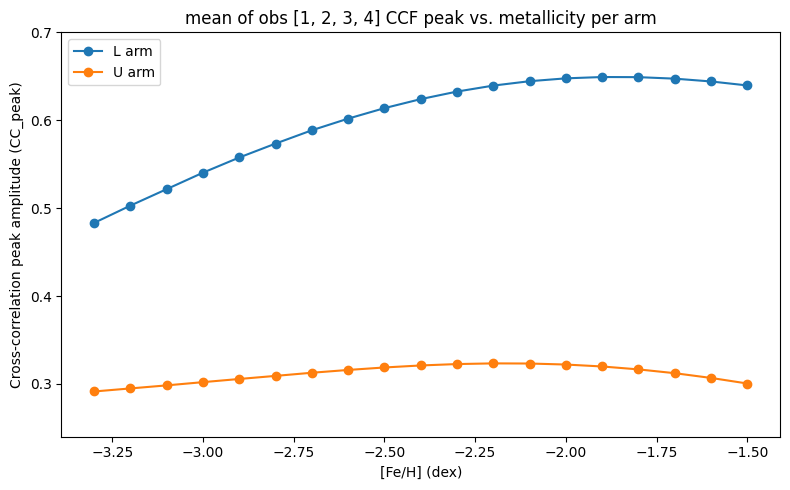

In [ ]:
# --- Plot CC_peak vs Fe/H for both arms on one figure ---

import matplotlib.pyplot as plt

# Ensure Fe/H is sorted
df_plot = ccf_rank_table.sort_values("feh")

plt.figure(figsize=(8,5))

for arm, color in zip(["L","U"], ["tab:blue","tab:orange"]):
    sub = df_plot[df_plot["arm"] == arm]
    plt.plot(sub["feh"], sub["CC_peak"], marker="o", lw=1.5,
             label=f"{arm} arm", color=color)

plt.axhline(0, color="k", lw=0.5)
plt.ylim(0.24,0.7)
# plt.xlim(0.45, 0.47)
plt.xlabel("[Fe/H] (dex)")
plt.ylabel("Cross-correlation peak amplitude (CC_peak)")
plt.title(f"mean of obs {[i+1 for i in star_obs]} CCF peak vs. metallicity per arm")
plt.legend()
plt.tight_layout()
plt.show()


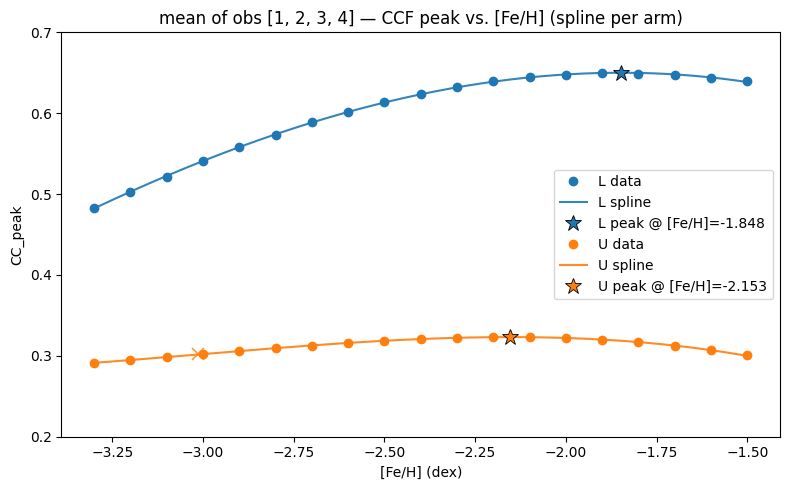

arm  feh_peak  CC_peak_at_peak
0   L -1.847717         0.650032
1   U -2.152679         0.323192

In [ ]:
from scipy.interpolate import UnivariateSpline
from scipy.optimize import brentq

def _roots(func, lo, hi, n=2000, atol=1e-12):
    xg, yg = np.linspace(lo,hi,n), func(np.linspace(lo,hi,n))
    roots=list(xg[np.isclose(yg,0,atol=atol)])
    sign=np.sign(yg); changes=np.where(np.diff(sign)!=0)[0]
    for i in changes:
        a,b,ya,yb=xg[i],xg[i+1],yg[i],yg[i+1]
        if np.isfinite(ya) and np.isfinite(yb):
            try: roots.append(brentq(func,a,b))
            except: pass
    return np.unique(np.round(roots,8))

def spline_peak(x,y,yerr=None,sfrac=0.15):
    m=np.isfinite(x)&np.isfinite(y); x,y=x[m],y[m]
    w=None
    if yerr is not None: yerr=np.clip(yerr[m],np.finfo(float).eps,np.inf); w=1/yerr
    dyn=max(y.max()-y.min(),1e-9); s=max(len(x)*(sfrac*dyn)**2,1e-10)
    spl=UnivariateSpline(x,y,k=3,s=s,w=w); d1,d2=spl.derivative(1),spl.derivative(2)
    lo,hi=x.min(),x.max(); crit=_roots(d1,lo,hi)
    if crit.size==0: xg=np.linspace(lo,hi,2000); i=np.argmax(spl(xg)); return xg[i],spl(xg[i]),spl,d1,d2,_roots(d2,lo,hi)
    crit=crit[d2(crit)<0] if np.any(d2(crit)<0) else crit; y_at=spl(crit); i=np.argmax(y_at); xpk,ypk=float(crit[i]),float(y_at[i])
    xl,xr=max(lo,xpk-0.05*(hi-lo)),min(hi,xpk+0.05*(hi-lo)); xv=-np.polyfit(np.linspace(xl,xr,21),spl(np.linspace(xl,xr,21)),2)[1]/(2*np.polyfit(np.linspace(xl,xr,21),spl(np.linspace(xl,xr,21)),2)[0])
    if lo<xv<hi and spl(xv)>ypk: xpk,ypk=float(xv),float(spl(xv))
    return xpk,ypk,spl,d1,d2,_roots(d2,lo,hi)

# collapse dataframe
cols=["arm","feh","CC_peak"]; extra=[c for c in ccf_rank_table.columns if c not in cols]; df_clean=ccf_rank_table[cols+extra]
has_err="CC_peak_err" in df_clean
dfp=(df_clean.dropna(subset=cols).groupby(["arm","feh"],as_index=False)
     .agg(CC_peak=("CC_peak","mean"),CC_peak_err=("CC_peak_err","mean") if has_err else ("CC_peak","size"))
     .sort_values(["arm","feh"]))

# run + plot
peaks=[]; plt.figure(figsize=(8,5))
for arm,col in zip(["L","U"],["tab:blue","tab:orange"]):
    sub=dfp[dfp.arm==arm]; x,y=sub.feh.to_numpy(),sub.CC_peak.to_numpy(); yerr=sub.CC_peak_err.to_numpy() if has_err else None
    if len(x)<4: plt.plot(x,y,"o-",color=col,label=f"{arm} arm (N={len(x)})"); continue
    xpk,ypk,spl,d1,d2,infl=spline_peak(x,y,yerr,sfrac=0.15); peaks.append({"arm":arm,"feh_peak":xpk,"CC_peak_at_peak":ypk})
    xg=np.linspace(x.min(),x.max(),800); plt.plot(x,y,"o",c=col,label=f"{arm} data"); plt.plot(xg,spl(xg),"-",c=col,alpha=0.9,label=f"{arm} spline")
    plt.plot([xpk],[ypk],"*",ms=12,c=col,mec="k",mew=0.6,label=f"{arm} peak @ [Fe/H]={xpk:.3f}")
    if infl.size: plt.plot(infl,spl(infl),"x",ms=8,mew=1.2,c=col,alpha=0.8)

plt.axhline(0,c="k",lw=0.5); plt.ylim(0.2,0.7)
plt.xlabel("[Fe/H] (dex)"); plt.ylabel("CC_peak"); 
plt.title(f"mean of obs {[i+1 for i in star_obs]} — CCF peak vs. [Fe/H] (spline per arm)"); plt.legend(); plt.tight_layout(); plt.show()
peak_table=pd.DataFrame(peaks).sort_values("arm"); display(peak_table)



below ERRORS:
step 1:
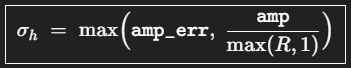   sigma_height = error in height of CCF function (includes absolute height and scales for noise around it).  amp_err is from Gaussian fit (the =error in its amplitude)   R (Tony_Davis parameter) is the rms of the antisymmetric CCF noise (gives SNR)                                          

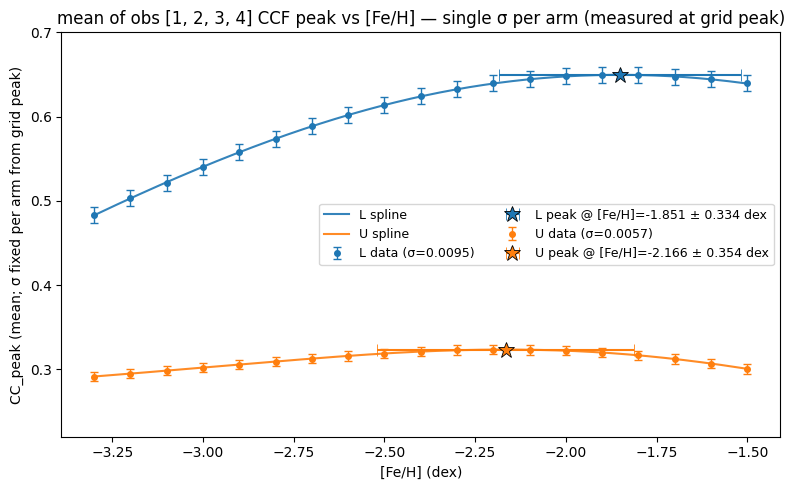

arm  feh_peak  feh_err_dex   sigma_y
0   L -1.851379     0.334242  0.009457
1   U -2.166168     0.353835  0.005683

[Fe/H] (combined L⊕U) = -2.000 ± 0.243 dex


In [ ]:
# === CCF peak vs [Fe/H] with a single σ per arm (measured at grid-peak) + 1σ-drop + combined L⊕U ===
import numpy as np, pandas as pd, matplotlib.pyplot as plt

# REQUIRE: you already defined `_roots` and `spline_peak`, and have `ccf_rank_table` + `ccf_by_arm`

def _fixed_sigma_y_from_grid_peak(arm, fit_win_local=15.0):
    """
    For this arm, find the grid-peak template in ccf_rank_table (max CC_peak),
    then compute a single vertical error σ_y using a TD-style estimate on that template only:
        σ_y = h / max(R, 1),  where R = h / (sqrt(2)*σ_a) and σ_a is antisymmetric CCF noise.
    """
    sub = ccf_rank_table.loc[ccf_rank_table["arm"] == arm].dropna(subset=["CC_peak"])
    if sub.empty:
        return np.nan, np.nan, None  # feh_grid_pk, sigma_y, (token for matching)

    # grid-peak row for this arm
    row = sub.loc[sub["CC_peak"].idxmax()]
    feh_grid = float(row["feh"])
    token_grid = row["token"] if "token" in row.index else None
    h = float(row["CC_peak"])

    # If we already stored sigma_h for this exact row, use it directly
    if "sigma_h" in sub.columns:
        sig_row = float(row["sigma_h"])
        if np.isfinite(sig_row) and sig_row > 0:
            return feh_grid, sig_row, token_grid

    # Otherwise compute TD σ from ccf_by_arm for this template
    # Try to find the matching entry in ccf_by_arm (prefer matching token+feh; else best CC at same feh)
    cand = []
    for tok, feh, RV, CC, rv0, cc0 in ccf_by_arm.get(arm, []):
        if token_grid is not None and tok == token_grid and np.isclose(feh, feh_grid, atol=1e-9):
            cand = [(tok, feh, RV, CC, rv0, cc0)]; break
        if token_grid is None and np.isclose(feh, feh_grid, atol=1e-9):
            cand.append((tok, feh, RV, CC, rv0, cc0))
    if not cand:
        return feh_grid, np.nan, token_grid

    # pick the candidate with highest grid-peak at this feh
    tok, feh, RV, CC, rv0, cc0 = sorted(cand, key=lambda r: r[-1], reverse=True)[0]

    # TD R from antisymmetric noise away from peak (exclude ±win around peak)
    win_a = max(2.0*fit_win_local, 20.0)
    resid_a = 0.5*(CC - CC[::-1])
    mask = (RV < rv0 - win_a) | (RV > rv0 + win_a)
    sigma_a = np.nanstd(resid_a[mask]) if mask.sum() > 10 else np.nanstd(resid_a)
    R_td = (h / (np.sqrt(2)*sigma_a)) if (np.isfinite(h) and np.isfinite(sigma_a) and sigma_a > 0) else np.nan
    sigma_y = (h / max(R_td, 1)) if np.isfinite(R_td) else np.nan
    return feh_grid, float(sigma_y), token_grid

# 1) Single σ_y per arm from the grid-peak template
fit_win_local = fit_win if "fit_win" in locals() else 15.0
sigma_y_by_arm = {}; feh_grid_by_arm = {}
for arm in ["L","U"]:
    feh_grid, sigma_y, tok = _fixed_sigma_y_from_grid_peak(arm, fit_win_local)
    sigma_y_by_arm[arm] = sigma_y
    feh_grid_by_arm[arm] = feh_grid

# 2) Collapse to mean CC_peak per [Fe/H] (UNWEIGHTED, since σ is constant per arm)
dfp = (ccf_rank_table
       .dropna(subset=["arm","feh","CC_peak"])
       .groupby(["arm","feh"], as_index=False)
       .agg(CC_mean=("CC_peak","mean"),
            N=("CC_peak","size")))

# 3) Plot with vertical error bars = constant σ_y (per arm), weighted spline with uniform weights,
#    1σ-drop (target = y_pk − σ_y), horizontal error bars at the star, table, and combined result.
feh_rows = []
plt.figure(figsize=(8,5))
for arm, color in zip(["L","U"], ["tab:blue","tab:orange"]):
    sub = dfp[dfp.arm == arm].sort_values("feh")
    if sub.empty:
        continue

    x = sub.feh.to_numpy()
    y = sub.CC_mean.to_numpy()
    sigma_y = sigma_y_by_arm.get(arm, np.nan)

    # Vertical error bars: same value for all points of this arm
    yerr = None if not np.isfinite(sigma_y) else np.full_like(y, sigma_y, dtype=float)
    plt.errorbar(x, y, yerr=yerr, fmt="o", ms=4, lw=1, capsize=3, color=color,
                 label=f"{arm} data (σ={sigma_y:.4f})" if np.isfinite(sigma_y) else f"{arm} data")

    # Weighted spline: uniform weights (equal σ everywhere)
    # Use your spline_peak helper; pass yerr so it sets weights but they are all equal
    xpk, ypk, spl, d1, d2, infl = spline_peak(x, y, yerr=yerr, sfrac=0.15)
    xg = np.linspace(x.min(), x.max(), 800)
    plt.plot(xg, spl(xg), "-", c=color, alpha=0.9, label=f"{arm} spline")

    # 1σ-drop crossings using the SAME σ_y across the curve
    if np.isfinite(sigma_y) and sigma_y > 0:
        target = ypk - sigma_y
        roots = _roots(lambda z: spl(z) - target, x.min(), x.max())
        left  = roots[roots < xpk].max() if (roots.size and np.any(roots < xpk)) else np.nan
        right = roots[roots > xpk].min() if (roots.size and np.any(roots > xpk)) else np.nan
        feh_err = 0.5*(right - left) if (np.isfinite(left) and np.isfinite(right)) else np.nan
    else:
        feh_err = np.nan

    # Star marker + HORIZONTAL error bar; legend includes ±dex
    star_label = f"{arm} peak @ [Fe/H]={xpk:+.3f}" + (f" ± {feh_err:.3f} dex" if np.isfinite(feh_err) else "")
    plt.errorbar([xpk], [ypk],
                 xerr=None if not np.isfinite(feh_err) else feh_err,
                 yerr=None, fmt="*", ms=12, color=color, mec="k", mew=0.6, capsize=4,
                 label=star_label)

    feh_rows.append({"arm": arm, "feh_peak": float(xpk), "feh_err_dex": float(feh_err), "sigma_y": float(sigma_y)})

# Cosmetics
plt.axhline(0, c="k", lw=0.5)
plt.xlabel("[Fe/H] (dex)")
plt.ylabel("CC_peak (mean; σ fixed per arm from grid peak)")
plt.title(f"mean of obs {[i+1 for i in star_obs]} CCF peak vs [Fe/H] — single σ per arm (measured at grid peak)")
plt.legend(ncol=2, fontsize=9, loc="best")
plt.tight_layout()
plt.ylim(0.22,0.7)
plt.show()

# 4) Per-arm table + combined L⊕U (inverse-variance in dex)
feh_err_table = pd.DataFrame(feh_rows).sort_values("arm").reset_index(drop=True)
display(feh_err_table)

m = (np.isfinite(feh_err_table.feh_peak) &
     np.isfinite(feh_err_table.feh_err_dex) &
     (feh_err_table.feh_err_dex > 0))
if m.sum() >= 1:
    xx = feh_err_table.loc[m, "feh_peak"].to_numpy()
    ss = feh_err_table.loc[m, "feh_err_dex"].to_numpy()
    ww = 1.0 / (ss**2)
    feh_comb = np.sum(ww * xx) / np.sum(ww)
    feh_comb_err = np.sqrt(1.0 / np.sum(ww))
    print(f"[Fe/H] (combined L⊕U) = {feh_comb:+.3f} ± {feh_comb_err:.3f} dex")
else:
    print("No valid arm errors to combine.")


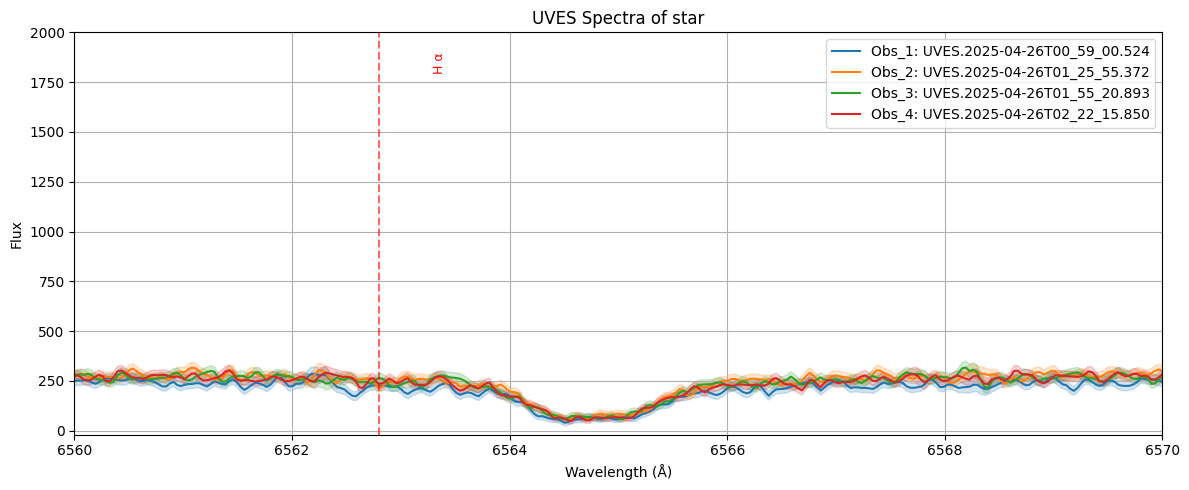

In [ ]:
import matplotlib.pyplot as plt

# grab the default colour cycle
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

fig, ax = plt.subplots(figsize=(12, 5))

for idx, (key, d) in enumerate(data_store.items()):
    col = colors[idx % len(colors)]  # one unique colour per observation

    # recover the integer index from "Obs_N"
    n = int(key.split('_')[1]) - 1
    obs_name = input_df.loc[n, 'Obs']

    # plot L-arm and its error envelope in the same colour
    ax.plot(d['wavelength_L'], d['flux_data_L'],
            label=f"{key}: {obs_name}", color=col)
    ax.fill_between(d['wavelength_L'],
                    d['flux_data_L'] - d['error_data_L'],
                    d['flux_data_L'] + d['error_data_L'],
                    color=col, alpha=0.3)

    # plot U-arm and its error envelope in the same colour
    ax.plot(d['wavelength_U'], d['flux_data_U'],
        #     label=f"{key} (U-arm)", color=col, alpha=0.8)
    )
    ax.fill_between(d['wavelength_U'],
                    d['flux_data_U'] - d['error_data_U'],
                    d['flux_data_U'] + d['error_data_U'],
                    color=col, alpha=0.2)

ax.set_xlabel("Wavelength (Å)")
ax.set_ylabel("Flux")
ax.set_title(f"UVES Spectra of star")
ax.grid(True)
ax.legend()


# Zoom-in region
# x_min, x_max = 5167, 5175
#H alpha
x_min, x_max = 6560, 6570
# y_min, y_max = 0, 200
y_min, y_max = -20, 2000
ax.set_xlim(x_min, x_max)
ax.set_ylim(y_min, y_max)

# Annotate visible spectral lines
for _, row in spectral_lines.iterrows():
    label = row["Label"]
    wl = row["Wavelength"]
    if x_min <= wl <= x_max:  # safer than wavelength_L[0]...
        ax.axvline(x=wl, color='red', linestyle='--', alpha=0.6)
        ax.text(wl + 0.5, y_max - 0.05 * (y_max - y_min), label,
                color='red', rotation=90, fontsize=9, va='top')

plt.tight_layout()
plt.show()

In [ ]:
from datetime import datetime

# 1) Build `entries` sorted by timestamp, exactly as before:
entries = []
for key, d in data_store.items():
    date_obs_str = d["header_L"]["DATE-OBS"]
    dt_obj       = datetime.fromisoformat(date_obs_str)
    entries.append((key, dt_obj, d))
entries.sort(key=lambda x: x[1])  # now chronological

# 2) Initialize variables:
prev_dt      = None
cum_delta_t  = pd.Timedelta(0)
records      = []

# 3) Loop over `entries` in order, but pull the “Obs No.” using star_obs:
for j, (key, curr_dt, d) in enumerate(entries):
    # Determine which row of input_df to use:
    row_index = star_obs[j]
    
    # “Obs No.” for this observation is at input_df.loc[row_index, "Obs No."]
    obs_no   = input_df.loc[row_index, "Obs No."]
    date_str = curr_dt.date().isoformat()
    time_str = curr_dt.time().isoformat()

    # Compute Δt from previous observation:
    if prev_dt is not None:
        delta_t     = curr_dt - prev_dt
        cum_delta_t += delta_t
    else:
        delta_t     = pd.Timedelta(0)
        cum_delta_t = pd.Timedelta(0)

    delta_t_secs = delta_t.total_seconds()
    prev_dt      = curr_dt

    # Store the row’s data:
    records.append({
        "observation no.":    obs_no,
        "date":               date_str,
        "time":               time_str,
        "delta t":            delta_t,
        "delta t (s)":        delta_t_secs,
        "cumulative delta t": cum_delta_t
    })

df_summary = pd.DataFrame(records)   # 4) Build the summary DataFrame:

df_summary

observation no.        date             time                delta t  \
0                1  2025-04-26  00:59:00.524000        0 days 00:00:00   
1                2  2025-04-26  01:25:55.371000 0 days 00:26:54.847000   
2                3  2025-04-26  01:55:20.892000 0 days 00:29:25.521000   
3                4  2025-04-26  02:22:15.850000 0 days 00:26:54.958000   

   delta t (s)     cumulative delta t  
0        0.000        0 days 00:00:00  
1     1614.847 0 days 00:26:54.847000  
2     1765.521 0 days 00:56:20.368000  
3     1614.958 0 days 01:23:15.326000

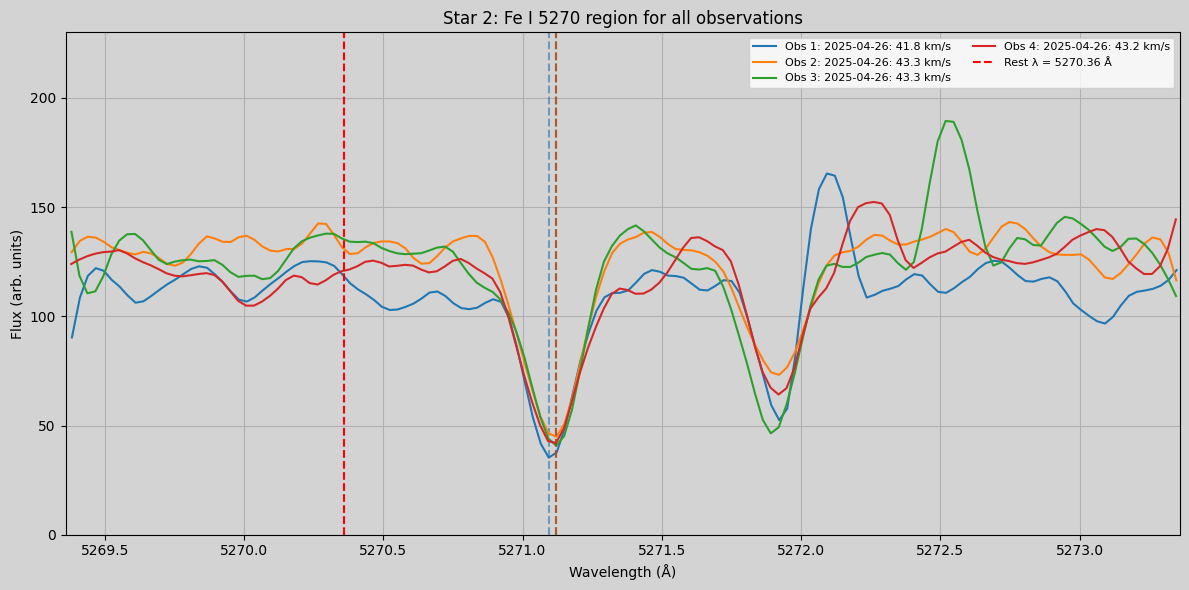

In [ ]:
from scipy.signal import savgol_filter
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.colors import LogNorm
from matplotlib.colors import PowerNorm

selected_line_label = "Fe I 5270"  # Choose the spectral line to zoom in on
selected_row = spectral_lines[spectral_lines["Label"] == selected_line_label].iloc[0]
rest_wavelength = selected_row["Wavelength"]

# build a Normalizer + viridis cmap keyed on your cumulative‐seconds column
# Convert Timedelta to seconds for normalization
times = df_summary["cumulative delta t"].apply(lambda x: x.total_seconds()).values
# norm = LogNorm(vmin=times.min()+1, vmax=times.max())
norm = PowerNorm(gamma=0.5, vmin=times.min(), vmax=times.max())
# norm  = mpl.colors.Normalize(vmin=times.min(), vmax=times.max())
# cmap  = plt.get_cmap("viridis")
# cmap = plt.get_cmap("plasma")
# cmap = plt.get_cmap("cividis")   #  worst
cmap = plt.get_cmap("coolwarm")

# Storage for all zoomed‐in flux/error extremes:
all_lower = []
all_upper = []

plt.figure(figsize=(12, 6))

# Set background colors
fig = plt.gcf()
ax = plt.gca()
fig.patch.set_facecolor('lightgray')
ax.set_facecolor('lightgray')

# Iterate in chronological order by zipping `entries` (which is the sorted list of (key, datetime, d))
# with df_summary rows.  That way, each row in df_summary corresponds to the same `d` in entries.
for (key, curr_dt, d), (_, row) in zip(entries, df_summary.iterrows()):
    date_str = row["date"]  # pull the date string from df_summary
    obs_no   = row["observation no."]   # pull the observation number


    # Merge L‐ and U‐arm:
    wavelength = np.hstack((d["wavelength_L"], d["wavelength_U"]))
    flux_data = np.hstack((d["flux_data_L"], d["flux_data_U"]))
    error_data = np.hstack((d["error_data_L"], d["error_data_U"]))

    # Sort by wavelength:
    sort_idx = np.argsort(wavelength)
    wavelength = wavelength[sort_idx]
    flux_data = flux_data[sort_idx]
    error_data = error_data[sort_idx]

    # Zoom window around the rest wavelength:
    x_start = rest_wavelength - 1
    x_end   = rest_wavelength + 3
    mask = (wavelength >= x_start) & (wavelength <= x_end)

    w_zoom = wavelength[mask]
    f_zoom = flux_data[mask]
    e_zoom = error_data[mask]

    if len(w_zoom) >= 11:
        # Smooth the zoomed‐in flux:
        f_smooth = savgol_filter(f_zoom, window_length=11, polyorder=3)

        # Find min of smoothed flux → observed centroid:
        idx_min = np.argmin(f_smooth)
        observed_wavelength = w_zoom[idx_min]
        delta_lambda = observed_wavelength - rest_wavelength
        velocity = (delta_lambda / rest_wavelength) * 299792.458

#  CHOOSE color scheme

        # 1) Plot the smoothed curve and capture its color, now including the date in the legend:
        sm_line, = plt.plot(
            w_zoom,
            f_smooth,
            label=f"Obs {int(obs_no)}: {date_str}: {velocity:.1f} km/s",
            linewidth=1.5
        )
        col = sm_line.get_color()


        # # 1) Plot the smoothed curve and capture its color - pick this epoch’s time in seconds and map it into [0,1]→viridis
        # tsec = row["cumulative delta t"].total_seconds()
        # col  = cmap(norm(tsec))

        # sm_line, = plt.plot(
        # w_zoom,
        # f_smooth,
        # color=col,
        # label=f"Obs {int(obs_no)} ({date_str}): {velocity:.1f} km/s",
        # linewidth=1.5)

        # # 2) Plot the raw (unsmoothed) spectrum in that same color, but lighter:
        # plt.plot(
        #     w_zoom,
        #     f_zoom,
        #     color=col,
        #     alpha=0.3,
        # )

        # 3) Draw a vertical line at the observed wavelength:
        plt.axvline(
            x=observed_wavelength,
            color=col,
            linestyle="--",
            alpha=0.6,
        )

        # Collect this spectrum’s ±‐error envelope for y‐limits:
        all_lower.append(f_zoom - e_zoom)
        all_upper.append(f_zoom + e_zoom)
    else:
        print(f"{key}: not enough points around {selected_line_label} for smoothing.")

# Draw the rest‐wavelength reference:
plt.axvline(
    x=rest_wavelength,
    color="red",
    linestyle="--",
    label=f"Rest λ = {rest_wavelength:.2f} Å"
)

# Compute combined y‐limits from all zoomed spectra:
if all_lower and all_upper:
    combined_lower = np.concatenate(all_lower)
    combined_upper = np.concatenate(all_upper)
    ymin = np.min(combined_lower)
    ymax = np.max(combined_upper)
    plt.ylim(ymin, ymax)

# Final formatting:

plt.xlim(x_start, x_end)
plt.ylim(0,230)
plt.xlabel("Wavelength (Å)")
plt.ylabel("Flux (arb. units)")
plt.title(f"Star 2: {selected_line_label} region for all observations")
plt.grid(True)
plt.legend(fontsize=8, ncol=2)
plt.tight_layout()
plt.show()


In [ ]:
# Assume `entries` and `df_summary` already exist and are in the same order.

from scipy.signal import savgol_filter
import numpy as np

velocities = []
delta_velocities = []
cum_delta_velocities = []

prev_velocity = None
cum_dv = 0.0

for (key, curr_dt, d) in entries:
    # Merge L and U arms:
    wavelength = np.hstack((d["wavelength_L"], d["wavelength_U"]))
    flux_data  = np.hstack((d["flux_data_L"], d["flux_data_U"]))
    error_data = np.hstack((d["error_data_L"], d["error_data_U"]))

    # Sort by wavelength:
    sort_idx   = np.argsort(wavelength)
    wavelength = wavelength[sort_idx]
    flux_data  = flux_data[sort_idx]
    error_data = error_data[sort_idx]

    # Zoom window around the rest wavelength:
    x_start = rest_wavelength - 0.2
    x_end   = rest_wavelength + 2.4
    mask    = (wavelength >= x_start) & (wavelength <= x_end)

    w_zoom = wavelength[mask]
    f_zoom = flux_data[mask]
    e_zoom = error_data[mask]

    # Compute velocity if enough points; otherwise NaN
    if len(w_zoom) >= 11:
        f_smooth  = savgol_filter(f_zoom, window_length=13, polyorder=2)
        idx_min   = np.argmin(f_smooth)
        w_obs     = w_zoom[idx_min]
        delta_λ   = w_obs - rest_wavelength
        velocity  = (delta_λ / rest_wavelength) * 299792.458
    else:
        velocity = np.nan

    # Compute delta_v and cumulative delta_v
    if (prev_velocity is not None) and (not np.isnan(velocity)):
        delta_v = velocity - prev_velocity
        cum_dv += delta_v
    else:
        delta_v = np.nan

    prev_velocity = velocity if not np.isnan(velocity) else prev_velocity

    velocities.append(velocity)
    delta_velocities.append(delta_v)
    cum_delta_velocities.append(cum_dv)

# Append new columns to df_summary:
df_summary["velocity (km/s)"] = velocities
df_summary["delta velocity (km/s)"] = delta_velocities
df_summary["cumulative delta v (km/s)"] = cum_delta_velocities
# Compute acceleration (km/s²) as Δv / Δt (s)
df_summary["accel (km/s²)"] = df_summary["delta velocity (km/s)"] / df_summary["delta t (s)"]


# Display the updated DataFrame:
df_summary


observation no.        date             time                delta t  \
0                1  2025-04-26  00:59:00.524000        0 days 00:00:00   
1                2  2025-04-26  01:25:55.371000 0 days 00:26:54.847000   
2                3  2025-04-26  01:55:20.892000 0 days 00:29:25.521000   
3                4  2025-04-26  02:22:15.850000 0 days 00:26:54.958000   

   delta t (s)     cumulative delta t  velocity (km/s)  delta velocity (km/s)  \
0        0.000        0 days 00:00:00        41.759984                    NaN   
1     1614.847 0 days 00:26:54.847000        43.335956               1.575972   
2     1765.521 0 days 00:56:20.368000        43.284001              -0.051955   
3     1614.958 0 days 01:23:15.326000        43.236353              -0.047648   

   cumulative delta v (km/s)  accel (km/s²)  
0                   0.000000            NaN  
1                   1.575972       0.000976  
2                   1.524017      -0.000029  
3                   1.476369      -0.000030

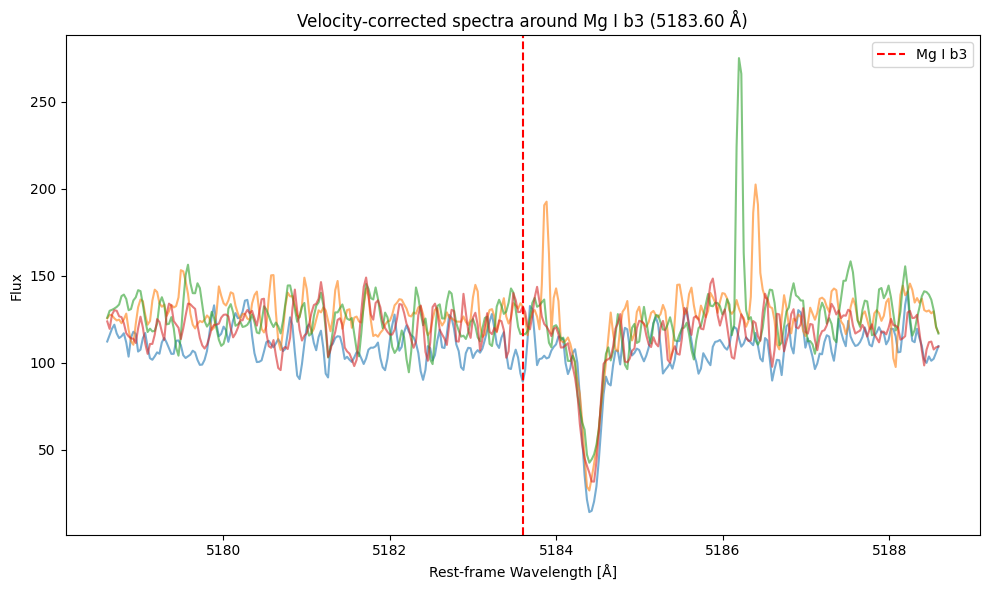

In [ ]:
#  SHIFT SPECTRUM TO REST FRAME

# --- Compute delta_lambdas for each observation ---
c_kms = 299792.458
rest_wavelength_mg_b3 = 5183.60  # Å, for Mg I b3

# Use the velocities list (already in km/s) to compute delta_lambda for each spectrum
delta_lambdas = []
for v in velocities:
    if np.isnan(v):
        delta_lambdas.append(np.nan)
    else:
        delta_lambdas.append((v / c_kms) * rest_wavelength_mg_b3)

# --- STEP 1: Shift each spectrum ---
rest_wavelengths = []
rest_fluxes = []

for i, (key, curr_dt, d) in enumerate(entries):
    wavelength = np.hstack((d["wavelength_L"], d["wavelength_U"]))
    flux_data  = np.hstack((d["flux_data_L"], d["flux_data_U"]))
    sort_idx   = np.argsort(wavelength)
    wavelength = wavelength[sort_idx]
    flux_data  = flux_data[sort_idx]
    # Use precomputed delta_lambdas from previous cell
    delta_λ = delta_lambdas[i]

    # Skip if delta_λ is nan
    if np.isnan(delta_λ):
        continue

    # Shift to rest frame
    lam_rest = wavelength - delta_λ
    rest_wavelengths.append(lam_rest)
    rest_fluxes.append(flux_data)

# --- STEP 2: Plot around Mg I b3 (5183.60 Å) for visual check ---

# Use spectral_lines DataFrame to get Mg I b3 wavelength
mg_b3_row = spectral_lines[spectral_lines["Label"].str.contains("Mg I b3", case=False)]
if mg_b3_row.empty:
    raise ValueError("Mg I b3 not found in spectral_lines")
mg_b3_wavelength = mg_b3_row["Wavelength"].values[0]

# Plotting window: ±5 Å (can be changed)
plot_window = 5.0
x_min = mg_b3_wavelength - plot_window
x_max = mg_b3_wavelength + plot_window

plt.figure(figsize=(10, 6))

for lam_rest, flux in zip(rest_wavelengths, rest_fluxes):
    mask = (lam_rest >= x_min) & (lam_rest <= x_max)
    plt.plot(lam_rest[mask], flux[mask], alpha=0.6)

plt.xlabel("Rest-frame Wavelength [Å]")
plt.ylabel("Flux")
plt.title(f"Velocity-corrected spectra around Mg I b3 ({mg_b3_wavelength:.2f} Å)")
plt.axvline(mg_b3_wavelength, color='red', linestyle='--', label='Mg I b3')
plt.legend()
plt.tight_layout()
plt.show()


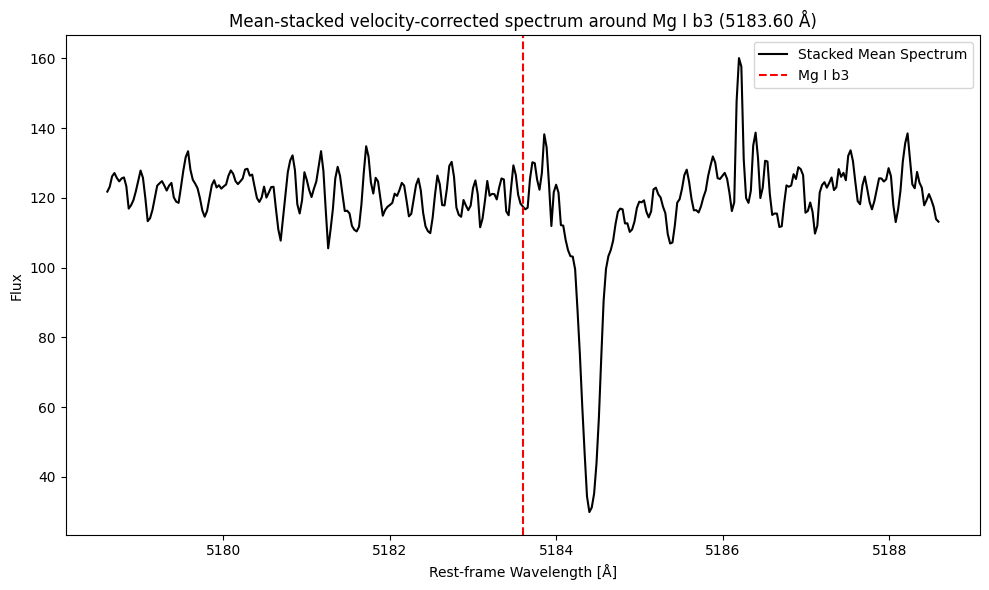

In [ ]:
# Concatenate all rest-wavelength arrays to get the min/max
all_lams = np.concatenate(rest_wavelengths)
lam_min = np.min(all_lams)
lam_max = np.max(all_lams)
pixel_size = np.median([np.median(np.diff(lam)) for lam in rest_wavelengths])  # auto step size

common_grid = np.arange(lam_min, lam_max, pixel_size)

from scipy.interpolate import interp1d

interpolated_fluxes = []

for lam_rest, flux in zip(rest_wavelengths, rest_fluxes):
    interp_func = interp1d(lam_rest, flux, kind='linear', bounds_error=False, fill_value=np.nan)
    flux_interp = interp_func(common_grid)
    interpolated_fluxes.append(flux_interp)

interpolated_fluxes = np.array(interpolated_fluxes)


stacked_flux = np.nanmean(interpolated_fluxes, axis=0)

# Zoom in around Mg I b3
mask = (common_grid >= x_min) & (common_grid <= x_max)

plt.figure(figsize=(10, 6))
plt.plot(common_grid[mask], stacked_flux[mask], color='black', label='Stacked Mean Spectrum')
plt.axvline(mg_b3_wavelength, color='red', linestyle='--', label='Mg I b3')
plt.xlabel("Rest-frame Wavelength [Å]")
plt.ylabel("Flux")
plt.title(f"Mean-stacked velocity-corrected spectrum around Mg I b3 ({mg_b3_wavelength:.2f} Å)")
plt.legend()
plt.tight_layout()
plt.show()




In [ ]:
import numpy as np
from astropy.time import Time

# Existing datetime column
df_summary['datetime'] = pd.to_datetime(df_summary['date'].astype(str) + ' ' + df_summary['time'].astype(str))

# Fix for future compatibility
time_astropy = Time(np.array(df_summary['datetime'].dt.to_pydatetime()), format='datetime')
df_summary['mjd'] = time_astropy.mjd
df_summary['error'] = 1.0

df_summary

/tmp/ipykernel_3983514/3171500520.py:8: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  time_astropy = Time(np.array(df_summary['datetime'].dt.to_pydatetime()), format='datetime')


observation no.        date             time                delta t  \
0                1  2025-04-26  00:59:00.524000        0 days 00:00:00   
1                2  2025-04-26  01:25:55.371000 0 days 00:26:54.847000   
2                3  2025-04-26  01:55:20.892000 0 days 00:29:25.521000   
3                4  2025-04-26  02:22:15.850000 0 days 00:26:54.958000   

   delta t (s)     cumulative delta t  velocity (km/s)  delta velocity (km/s)  \
0        0.000        0 days 00:00:00        41.759984                    NaN   
1     1614.847 0 days 00:26:54.847000        43.335956               1.575972   
2     1765.521 0 days 00:56:20.368000        43.284001              -0.051955   
3     1614.958 0 days 01:23:15.326000        43.236353              -0.047648   

   cumulative delta v (km/s)  accel (km/s²)                datetime  \
0                   0.000000            NaN 2025-04-26 00:59:00.524   
1                   1.575972       0.000976 2025-04-26 01:25:55.371   
2                   1.524017      -0.000029 2025-04-26 01:55:20.892   
3                   1.476369      -0.000030 2025-04-26 02:22:15.850   

            mjd  error  
0  60791.040978    1.0  
1  60791.059669    1.0  
2  60791.080103    1.0  
3  60791.098795    1.0

In [ ]:
# ## THE Joker

# from thejoker import JokerPrior, TheJoker, RVData
# from thejoker.plot import plot_rv_curves
# from thejoker import MAP_sample
# import astropy.units as u
# import matplotlib.pyplot as plt
# import numpy as np
# import math

# from sys import stdin, argv, exit

# t   = df_summary['mjd'].to_numpy()
# rv  = df_summary['velocity (km/s)'].to_numpy() * u.km/u.s
# err = df_summary['error'].to_numpy() * u.km/u.s

# data = RVData(t=t, rv=rv, rv_err=err)

# prior = JokerPrior.default(P_min=1*u.day, P_max=100*u.day,
#                            sigma_K0=30*u.km/u.s, sigma_v=100*u.km/u.s)
# joker = TheJoker(prior)

# prior_samples = prior.sample(size=300_000)
# samples = joker.rejection_sample(data, prior_samples)

# for i, sample in enumerate(samples):
#     print(f"Sample {i + 1}:")
#     print(f"  P: {sample['P']}")
#     print(f"  e: {sample['e']}")
#     print(f"  omega: {sample['omega']}")
#     print(f"  M0: {sample['M0']}")
#     print(f"  s: {sample['s']}")
#     print(f"  K: {sample['K']}")
#     print(f"  v0: {sample['v0']}")
#     print()

# fig = plt.figure(figsize=(8,8))

# ax1 = plt.subplot2grid((2, 2), (0, 0)) 
# ax2 = plt.subplot2grid((2, 2), (0, 1))
# ax3 = plt.subplot2grid((2, 2), (1, 0), colspan=2)

# fig.patch.set_facecolor('lightgray')  # Background of the whole figure
# ax1.set_facecolor('lightgray')        # Background of plot area for ax1
# ax2.set_facecolor('lightgray')        # Background of plot area for ax2
# ax3.set_facecolor('lightgray')        # Background of plot area for ax3

# ##data.plot(ax=ax1)

# ax1.errorbar(t, rv, xerr=None, yerr=err, marker='s', mfc='red', mec='green', ms=3, mew=4, ls='none')

# ax1.set_xlabel("Mean Julian Date")
# ax1.set_ylabel("RV [km/sec]")

# mrv=sum(rv/err**2)/sum(1/err**2)
# chi2=sum((mrv-rv)**2/err**2)/(len(rv)-1)

# mrv=mrv/(u.km/u.s)

# a,b = ax1.get_xlim()
# c,d = ax1.get_ylim()

# ax1.plot([a, b], [mrv.item(), mrv], linestyle='dashed')

# starname = "UMa3_star2"
# #txt = f'Star: {starname}   $\chi_r^2 = {chi2:.2f} $'
# txt = fr'Star: {starname}   $\chi_r^2 = {chi2:.2f}$'
# ax1.set_title(txt)

# ##mx=a+(b-a)*0.7
# ##my=c+0.2*(d-c)
# ##ax1.text(mx, my, txt, fontsize=13)

# ax2.scatter(samples['P'].value, abs(samples['K'].to(u.km/u.s).value),
#            marker='X', color='k', alpha=0.45) # doctest: +SKIP
# ax2.set_xlabel("$P$ [day]")
# ax2.set_ylabel("$K$ [km/s]")

# a=0.9*min(samples['P'].value)
# b=1.1*max(samples['P'].value)

# ax2.set_xlim(a,b)
# ax2.set_ylim(0, 1.1*max(abs(samples['K'].value)))

# G  = 0.0043
# M1 = 0.8     # in Msun
# PC = 3.08576E13

# pth = np.linspace(a, b, 100)*3600.0*24.0
# k01 = (G*PC*0.1**3*2*math.pi/(pth*(M1+0.1)**2))**(1/3)
# k03 = (G*PC*0.3**3*2*math.pi/(pth*(M1+0.3)**2))**(1/3)
# k10 = (G*PC*1.0**3*2*math.pi/(pth*(M1+1.0)**2))**(1/3)

# pth = pth/3600.0/24.0

# ax2.plot(pth, k01, color='red', linestyle=':', marker=None)
# ax2.plot(pth, k03, color='red', linestyle=':', marker=None)
# ax2.plot(pth, k10, color='red', linestyle=':', marker=None)

# xmean=a+(b-a)/3
# k01v = (G*PC*0.1**3*2*math.pi/(((a+b)/2*3600.0*24.0)*(M1+0.1)**2))**(1/3)
# ax2.text(xmean,k01v,"$m_2 = 0.1  M_\u2609$",fontsize=10,color='red')

# k03v = (G*PC*0.3**3*2*math.pi/(((a+b)/2*3600.0*24.0)*(M1+0.3)**2))**(1/3)
# ax2.text(xmean,k03v,"$m_2 = 0.3  M_\u2609$",fontsize=10,color='red')

# k10v = (G*PC*1.0**3*2*math.pi/(((a+b)/2*3600.0*24.0)*(M1+1.0)**2))**(1/3)
# ax2.text(xmean,k10v,"$m_2 = 1.0  M_\u2609$",fontsize=10,color='red')


# t_grid = np.linspace(min(t), max(t), 1024)
# plot_rv_curves(samples, t_grid, rv_unit=u.km/u.s, data=data, ax=ax3,
#                plot_kwargs=dict(color='#008888'))

# ax3.set_xlim(min(t)-2, max(t)+2)

# outfile = starname + '.pdf'

# plt.savefig(outfile)

# ##plt.show()

Observed Mg I b3 line center: 5185.15 Å
Radial velocity shift: 89.36 km/s


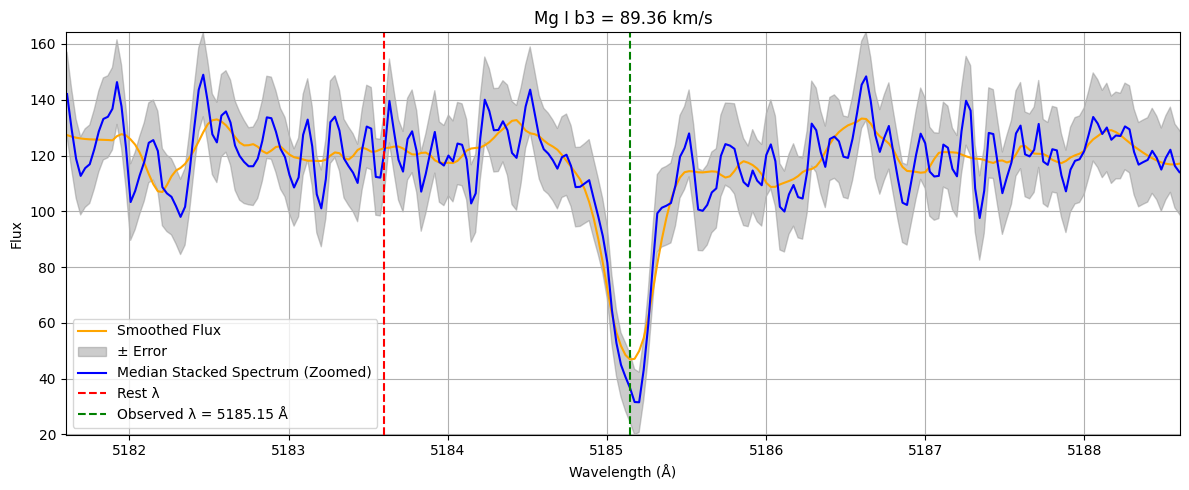

In [ ]:
# === DYNAMIC ZOOMING FOR Hα and other elements===

# Select the line label to zoom in on
selected_line_label = "Mg I b3"  # Change this to the desired line label
selected_row = spectral_lines[spectral_lines["Label"] == selected_line_label].iloc[0]
rest_wavelength = selected_row["Wavelength"]


# Sort by wavelength
sort_idx = np.argsort(wavelength)
wavelength = wavelength[sort_idx]
flux_data = flux_data[sort_idx]
error_data = error_data[sort_idx]

# Only proceed if line is within spectral range
if wavelength[0] <= rest_wavelength <= wavelength[-1]:
    x_start = rest_wavelength - 2
    x_end = rest_wavelength + 5

    mask = (wavelength >= x_start) & (wavelength <= x_end)
    w_zoom = wavelength[mask]
    f_zoom = flux_data[mask]
    e_zoom = error_data[mask]

    if len(w_zoom) >= 11:  # Needed for smoothing window
        from scipy.signal import savgol_filter
        f_smooth = savgol_filter(f_zoom, window_length=21, polyorder=3)   #   window_length must be odd and >= polyorder + 2

        # Velocity measurement
        idx_min = np.argmin(f_smooth)
        observed_wavelength = w_zoom[idx_min]
        delta_lambda = observed_wavelength - rest_wavelength
        velocity = (delta_lambda / rest_wavelength) * 299792.458

        print(f"Observed {selected_line_label} line center: {observed_wavelength:.2f} Å")
        print(f"Radial velocity shift: {velocity:.2f} km/s")


        # Plot
        plt.figure(figsize=(12, 5))
        # plt.plot(wavelength, flux_data, label="Flux", color='blue')
        plt.plot(w_zoom, f_smooth, color='orange', label='Smoothed Flux')
        plt.fill_between(wavelength, flux_data - error_data, flux_data + error_data,
                         color='gray', alpha=0.4, label='± Error')

    
        plt.plot(w_zoom, f_zoom, label='Median Stacked Spectrum (Zoomed)', color='BLUE') # Added color for consistency
        plt.axvline(x=rest_wavelength, color='red', linestyle='--', label="Rest λ")
        plt.axvline(x=observed_wavelength, color='green', linestyle='--', label=f"Observed λ = {observed_wavelength:.2f} Å")

        plt.xlim(x_start, x_end)
        ymin = np.min(f_zoom - e_zoom)
        ymax = np.max(f_zoom + e_zoom)
        plt.ylim(ymin, ymax)

        plt.xlabel("Wavelength (Å)")
        plt.ylabel("Flux")
        plt.title(f"{selected_line_label} = {velocity:.2f} km/s")
        plt.grid(True)
        plt.legend()
        plt.tight_layout()
        plt.show()
    else:
        print(f"Not enough points in zoom window to perform smoothing.")
else:
    print(f"{selected_line_label} is outside the wavelength range.")

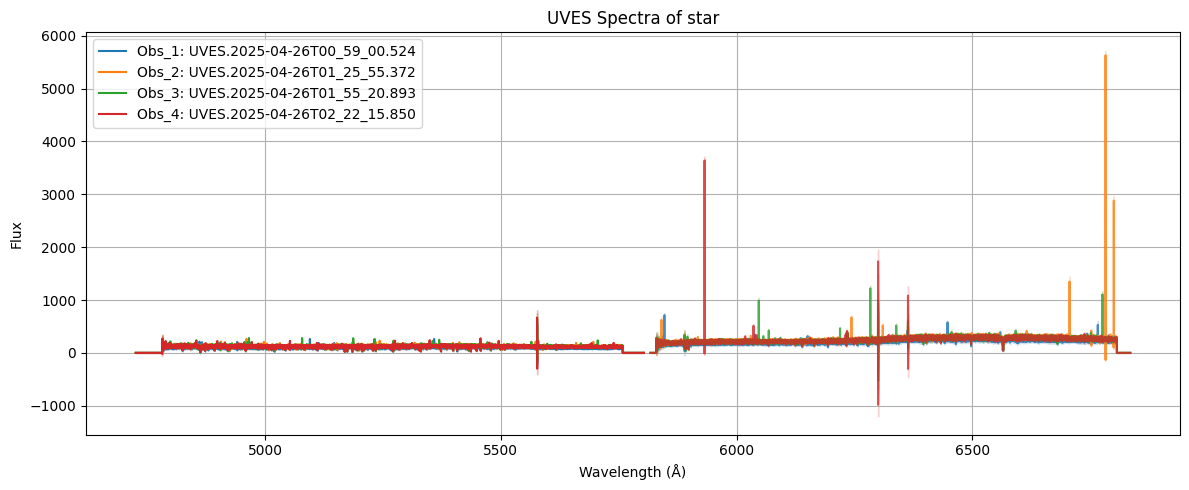

In [ ]:
import matplotlib.pyplot as plt

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
fig, ax = plt.subplots(figsize=(12, 5))

for idx, (key, d) in enumerate(data_store.items()):
    col = colors[idx % len(colors)]

    # recover the integer index from "Obs_N"
    n = int(key.split('_')[1]) - 1
    obs_name = input_df.loc[n, 'Obs']

    # now include it in the legend label
    ax.plot(d['wavelength_L'], d['flux_data_L'],
            label=f"{key}: {obs_name}", color=col)
    ax.fill_between(d['wavelength_L'],
                    d['flux_data_L'] - d['error_data_L'],
                    d['flux_data_L'] + d['error_data_L'],
                    color=col, alpha=0.3)

    ax.plot(d['wavelength_U'], d['flux_data_U'], color=col, alpha=0.8)
    ax.fill_between(d['wavelength_U'],
                    d['flux_data_U'] - d['error_data_U'],
                    d['flux_data_U'] + d['error_data_U'],
                    color=col, alpha=0.2)

ax.set_xlabel("Wavelength (Å)")
ax.set_ylabel("Flux")
ax.set_title("UVES Spectra of star")
ax.grid(True)
ax.legend()

# ... your zoom + line‐annotation code unchanged ...
plt.tight_layout()
plt.show()


In [ ]:
spectral_lines

Label  Wavelength
0      Ca II K     3933.66
1      Ca II H     3968.47
2    Ca I 4227     4226.73
3    Fe I 4046     4045.81
4    Fe I 4384     4383.55
5    Fe I 5270     5270.36
6    Fe I 5328     5328.04
7      Mg I b1     5167.32
8      Mg I b2     5172.68
9      Mg I b3     5183.60
10   He I 4471     4471.50
11         H γ     4340.50
12         H β     4861.30
13     Na I D1     5890.00
14     Na I D2     5896.00
15         H α     6562.80
16  Ca II 8498     8498.02
17  Ca II 8542     8542.09
18  Ca II 8662     8662.14

/tmp/ipykernel_3983514/2361644783.py:40: RuntimeWarning: All-NaN slice encountered
  stacked_median_clipped = np.nanmedian(clipped_flux, axis=0)
/usr/lib/python3/dist-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


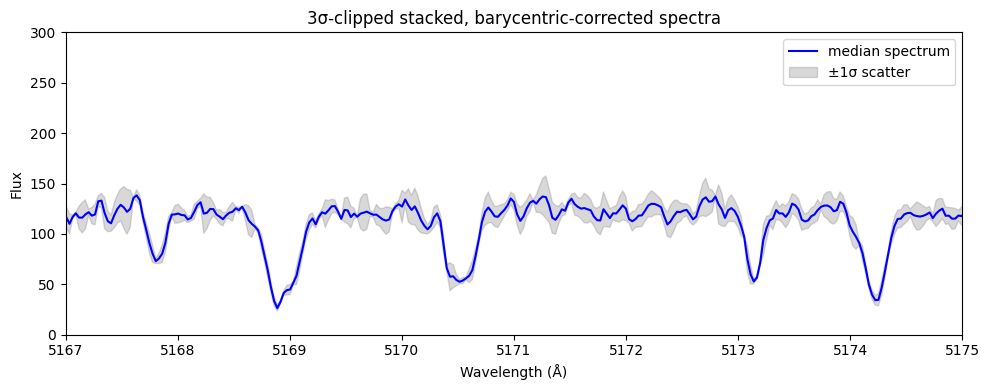

In [ ]:
#  STACK

# 1) Choose a reference grid. Use the first available observation in data_store:
first_key = sorted(data_store.keys())[0]
ref_wave = np.sort(
    np.hstack([
        data_store[first_key]['wavelength_L'],
        data_store[first_key]['wavelength_U']
    ])
)

# 2) Interpolate every Obs_i onto ref_wave
all_flux_on_ref = []
for key in sorted(data_store):           # makes sure Obs_6, Obs_7, …
    wl = np.hstack([data_store[key]['wavelength_L'],
                    data_store[key]['wavelength_U']])
    fl = np.hstack([data_store[key]['flux_data_L'],
                    data_store[key]['flux_data_U']])
    # simple 1D interpolation:
    interp_fl = np.interp(ref_wave, wl, fl)
    all_flux_on_ref.append(interp_fl)

# Convert to array (shape = [n_obs, n_pix])
all_flux = np.array(all_flux_on_ref)

# Median and standard deviation across exposures
med = np.median(all_flux, axis=0)
std = np.std(all_flux, axis=0)

# Compute absolute deviation from median
abs_dev = np.abs(all_flux - med)

# Mask: True where within 2σ
mask = abs_dev < (2 * std)

# Set outliers to np.nan so we can ignore them in final stacking
clipped_flux = np.where(mask, all_flux, np.nan)

# Now compute clipped median stack, ignoring NaNs
stacked_median_clipped = np.nanmedian(clipped_flux, axis=0)
stacked_std_clipped    = np.nanstd(clipped_flux, axis=0)

# 4) plot
plt.figure(figsize=(10,4))
plt.plot(ref_wave, stacked_median_clipped,      color='BLUE', label='median spectrum')
plt.fill_between(ref_wave,
                 stacked_median_clipped-stacked_std_clipped,
                 stacked_median_clipped+stacked_std_clipped,
                 color='gray', alpha=0.3, label='±1σ scatter')
plt.xlabel("Wavelength (Å)")
plt.ylabel("Flux")
plt.title("3σ-clipped stacked, barycentric-corrected spectra")
plt.legend()

plt.xlim(5167, 5175)  # zoom in on the interesting part
plt.ylim(0, 300)


plt.tight_layout()
plt.show()


In [ ]:
data_store

{'Obs_1': {'wavelength_L': array([4726.09084239, 4726.11936764, 4726.14789288, ..., 5803.43223299,
         5803.46075823, 5803.48928348]),
  'flux_data_L': array([0., 0., 0., ..., 0., 0., 0.], dtype='>f4'),
  'error_data_L': array([0.6666667, 1.       , 1.       , ..., 1.       , 1.       ,
         0.6666667], dtype='>f4'),
  'wavelength_U': array([5817.20469204, 5817.23888234, 5817.27307263, ..., 6834.43426498,
         6834.46845527, 6834.50264556]),
  'flux_data_U': array([0., 0., 0., ..., 0., 0., 0.], dtype='>f4'),
  'error_data_U': array([0.6666667, 1.       , 1.       , ..., 1.       , 1.       ,
         0.6666667], dtype='>f4'),
  'header_L': SIMPLE  =                    T / file does conform to FITS standard             
  BITPIX  =                  -32 / number of bits per data pixel                  
  NAXIS   =                    1 / number of data axes                            
  NAXIS1  =                37771 / length of data axis 1                          
  EXTEND 

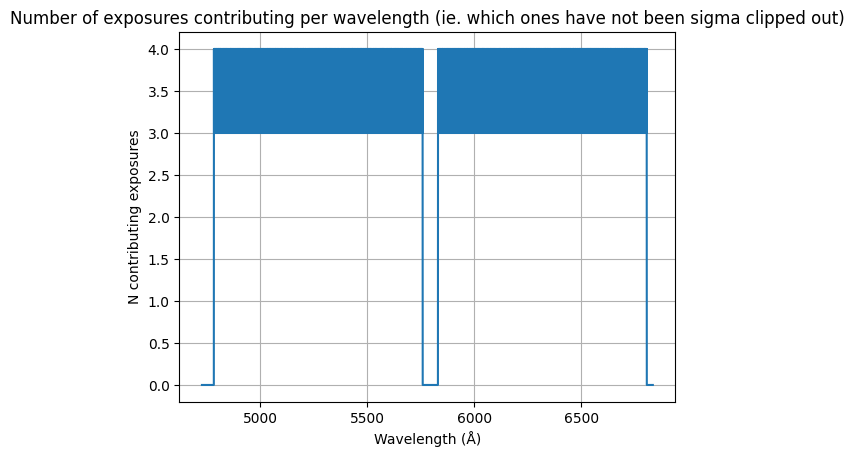

In [ ]:
plt.figure()
plt.plot(ref_wave, np.sum(mask, axis=0))
plt.title("Number of exposures contributing per wavelength (ie. which ones have not been sigma clipped out)")
plt.xlabel("Wavelength (Å)")
plt.ylabel("N contributing exposures")
plt.grid(True)
plt.show()

In [ ]:
spectral_lines.sort_values(by="Wavelength", inplace=True)
spectral_lines

Label  Wavelength
0      Ca II K     3933.66
1      Ca II H     3968.47
3    Fe I 4046     4045.81
2    Ca I 4227     4226.73
11         H γ     4340.50
4    Fe I 4384     4383.55
10   He I 4471     4471.50
12         H β     4861.30
7      Mg I b1     5167.32
8      Mg I b2     5172.68
9      Mg I b3     5183.60
5    Fe I 5270     5270.36
6    Fe I 5328     5328.04
13     Na I D1     5890.00
14     Na I D2     5896.00
15         H α     6562.80
16  Ca II 8498     8498.02
17  Ca II 8542     8542.09
18  Ca II 8662     8662.14

Observed Mg I b3 line center: 5185.15 Å
Radial velocity shift: 89.50 km/s
Heliocentric velocity: 89.50 km/s
Barycentric velocity: 89.50 km/s


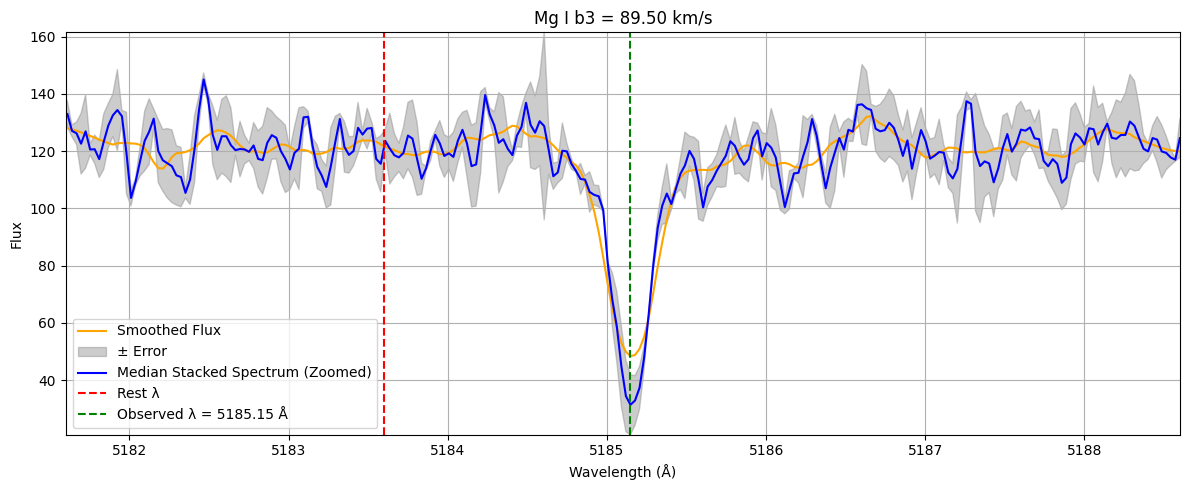

In [ ]:
# === DYNAMIC ZOOMING FOR Hα and other elements===

# Select the line label to zoom in on
selected_line_label = "Mg I b3"  # Change this to the desired line label
selected_row = spectral_lines[spectral_lines["Label"] == selected_line_label].iloc[0]
rest_wavelength = selected_row["Wavelength"]

# Combine spectrum before masking
wavelength = ref_wave    #  this is just the wavelength saved in obs 6, could be form any - as they are all inteprolated in first cell the same 
flux_data = stacked_median_clipped    #  this is the median spectrum clipped below 2 sigma - from previous cell
error_data = stacked_std_clipped

# Sort by wavelength
sort_idx = np.argsort(wavelength)
wavelength = wavelength[sort_idx]
flux_data = flux_data[sort_idx]
error_data = error_data[sort_idx]

# Only proceed if line is within spectral range
if wavelength[0] <= rest_wavelength <= wavelength[-1]:
    x_start = rest_wavelength - 2
    x_end = rest_wavelength + 5

    mask = (wavelength >= x_start) & (wavelength <= x_end)
    w_zoom = wavelength[mask]
    f_zoom = flux_data[mask]
    e_zoom = error_data[mask]

    if len(w_zoom) >= 11:  # Needed for smoothing window
        from scipy.signal import savgol_filter
        f_smooth = savgol_filter(f_zoom, window_length=21, polyorder=3)   #   window_length must be odd and >= polyorder + 2

        # Velocity measurement
        idx_min = np.argmin(f_smooth)
        observed_wavelength = w_zoom[idx_min]
        delta_lambda = observed_wavelength - rest_wavelength
        velocity = (delta_lambda / rest_wavelength) * 299792.458
        # velocity_helio = velocity + ( header_L['HELICORR'])
        # velocity_bary = velocity + ( header_L['BARYCORR'])
        velocity_helio = velocity
        velocity_bary = velocity

        print(f"Observed {selected_line_label} line center: {observed_wavelength:.2f} Å")
        print(f"Radial velocity shift: {velocity:.2f} km/s")
        print(f"Heliocentric velocity: {velocity_helio:.2f} km/s")
        print(f"Barycentric velocity: {velocity_bary:.2f} km/s")

        # Plot
        plt.figure(figsize=(12, 5))
        # plt.plot(wavelength, flux_data, label="Flux", color='blue')
        plt.plot(w_zoom, f_smooth, color='orange', label='Smoothed Flux')
        plt.fill_between(wavelength, flux_data - error_data, flux_data + error_data,
                         color='gray', alpha=0.4, label='± Error')

    
        plt.plot(w_zoom, f_zoom, label='Median Stacked Spectrum (Zoomed)', color='BLUE') # Added color for consistency
        plt.axvline(x=rest_wavelength, color='red', linestyle='--', label="Rest λ")
        plt.axvline(x=observed_wavelength, color='green', linestyle='--', label=f"Observed λ = {observed_wavelength:.2f} Å")

        plt.xlim(x_start, x_end)
        ymin = np.min(f_zoom - e_zoom)
        ymax = np.max(f_zoom + e_zoom)
        plt.ylim(ymin, ymax)

        plt.xlabel("Wavelength (Å)")
        plt.ylabel("Flux")
        plt.title(f"{selected_line_label} = {velocity_bary:.2f} km/s")
        plt.grid(True)
        plt.legend()
        plt.tight_layout()
        plt.show()
    else:
        print(f"Not enough points in zoom window to perform smoothing.")
else:
    print(f"{selected_line_label} is outside the wavelength range.")

Observed H α line center: 6564.81 Å
Radial velocity shift: 91.65 km/s
Heliocentric velocity: 70.33 km/s
Barycentric velocity: 70.32 km/s


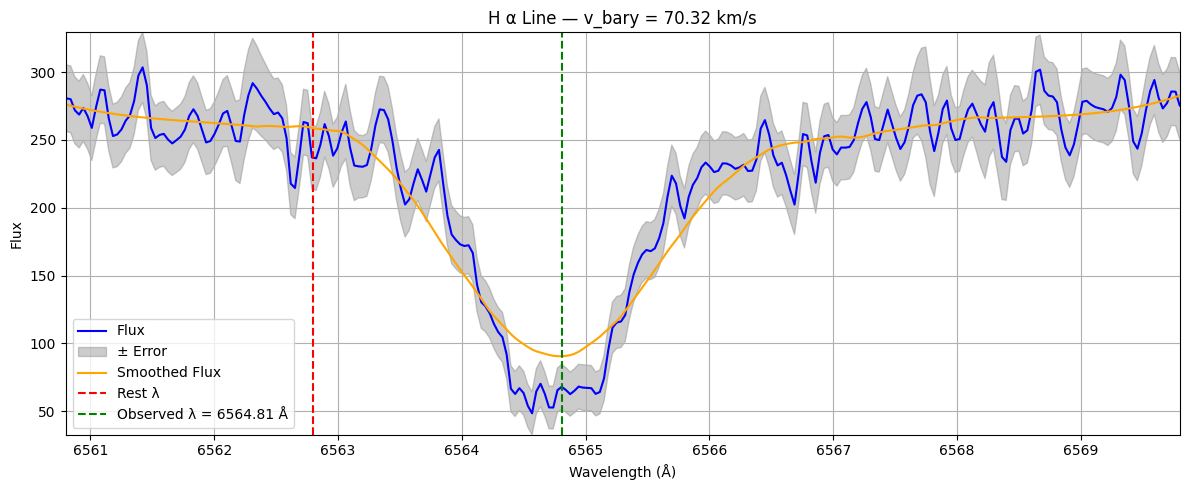

In [ ]:
# === DYNAMIC ZOOMING FOR Hα and other elements===

# Select the line label to zoom in on
selected_line_label = "H α"  # Change this to the desired line label
selected_row = spectral_lines[spectral_lines["Label"] == selected_line_label].iloc[0]
rest_wavelength = selected_row["Wavelength"]

# Combine spectrum before masking
wavelength = np.concatenate([wavelength_L, wavelength_U])
flux_data = np.concatenate([flux_data_L, flux_data_U])
error_data = np.concatenate([error_data_L, error_data_U])

# Sort by wavelength
sort_idx = np.argsort(wavelength)
wavelength = wavelength[sort_idx]
flux_data = flux_data[sort_idx]
error_data = error_data[sort_idx]

# Only proceed if line is within spectral range
if wavelength[0] <= rest_wavelength <= wavelength[-1]:
    x_start = rest_wavelength - 2
    x_end = rest_wavelength + 7

    mask = (wavelength >= x_start) & (wavelength <= x_end)
    w_zoom = wavelength[mask]
    f_zoom = flux_data[mask]
    e_zoom = error_data[mask]

    if len(w_zoom) >= 11:  # Needed for smoothing window
        from scipy.signal import savgol_filter
        f_smooth = savgol_filter(f_zoom, window_length=91, polyorder=3)   #   window_length must be odd and >= polyorder + 2

        # Velocity measurement
        idx_min = np.argmin(f_smooth)
        observed_wavelength = w_zoom[idx_min]
        delta_lambda = observed_wavelength - rest_wavelength
        velocity = (delta_lambda / rest_wavelength) * 299792.458
        velocity_helio = velocity + header_L['HELICORR']
        velocity_bary = velocity + header_L['BARYCORR']

        print(f"Observed {selected_line_label} line center: {observed_wavelength:.2f} Å")
        print(f"Radial velocity shift: {velocity:.2f} km/s")
        print(f"Heliocentric velocity: {velocity_helio:.2f} km/s")
        print(f"Barycentric velocity: {velocity_bary:.2f} km/s")

        # Plot
        plt.figure(figsize=(12, 5))
        plt.plot(wavelength, flux_data, label="Flux", color='blue')
        plt.fill_between(wavelength, flux_data - error_data, flux_data + error_data,
                         color='gray', alpha=0.4, label='± Error')

        plt.plot(w_zoom, f_smooth, color='orange', label='Smoothed Flux')
        plt.axvline(x=rest_wavelength, color='red', linestyle='--', label="Rest λ")
        plt.axvline(x=observed_wavelength, color='green', linestyle='--', label=f"Observed λ = {observed_wavelength:.2f} Å")

        plt.xlim(x_start, x_end)
        ymin = np.min(f_zoom - e_zoom)
        ymax = np.max(f_zoom + e_zoom)
        plt.ylim(ymin, ymax)

        plt.xlabel("Wavelength (Å)")
        plt.ylabel("Flux")
        plt.title(f"{selected_line_label} Line — v_bary = {velocity_bary:.2f} km/s")
        plt.grid(True)
        plt.legend()
        plt.tight_layout()
        plt.show()
    else:
        print(f"Not enough points in zoom window to perform smoothing.")
else:
    print(f"{selected_line_label} is outside the wavelength range.")

#  NOTE:  Heliocentric velocity - you need to correct for the Earth's motion around the Sun.  This is done using the Heliocentric Julian Date (HJD) and the barycentric correction.  The barycentric correction is a small correction that accounts for the motion of the Earth around the center of mass of the solar system.  It is typically on the order of a few km/s.
#  The barycentric correction can be calculated using the barycentric velocity formula, which takes into account the position of the Earth in its orbit around the Sun.  This correction is important for high-precision spectroscopy, especially when measuring radial velocities of stars or other celestial objects.

In [ ]:
range(4,10)

range(4, 10)

In [ ]:
#  1. Read all four Star 1 exposures into Spectrum1D objects

from astropy import units as u
from astropy.coordinates import SkyCoord, EarthLocation, AltAz
from specutils import Spectrum1D

spectra = []

for idx in star_obs:                      # 0…3 are your Star 1 rows
    row = input_df.iloc[idx]

    # --- Load lower + upper arms and stitch (as you already do) -----------
    fl_L   = fits.getdata(f"{row.Obs}/{row.subfolder}/{row.REDL}", 0)
    hd_L   = fits.getheader(f"{row.Obs}/{row.subfolder}/{row.REDL}", 0)
    fl_U   = fits.getdata(f"{row.Obs}/{row.subfolder}/{row.REDU}", 0)
    hd_U   = fits.getheader(f"{row.Obs}/{row.subfolder}/{row.REDU}", 0)

    w_L = hd_L['CRVAL1'] + hd_L['CDELT1'] * np.arange(fl_L.size)
    w_U = hd_U['CRVAL1'] + hd_U['CDELT1'] * np.arange(fl_U.size)

    wave   = np.hstack([w_L, w_U]) * u.angstrom
    flux   = np.hstack([fl_L, fl_U]) * u.Unit('erg cm-2 s-1 Angstrom-1')

    # store header & spectrum together
    spectra.append( (Spectrum1D(flux=flux, spectral_axis=wave), hd_L) )


        Use Spectrum instead. [warnings]


idx  DATE-OBS             λmin–λmax (Å)              Npix     med(F)      σ_MAD
  0  2025-04-26T00:59:00.524   4726.4– 6835.0   67526        125       59.9
  1  2025-04-26T01:25:55.371   4726.4– 6835.0   67526        144       66.8
  2  2025-04-26T01:55:20.892   4726.4– 6835.0   67526        142         65
  3  2025-04-26T02:22:15.850   4726.4– 6835.0   67526        138       65.8


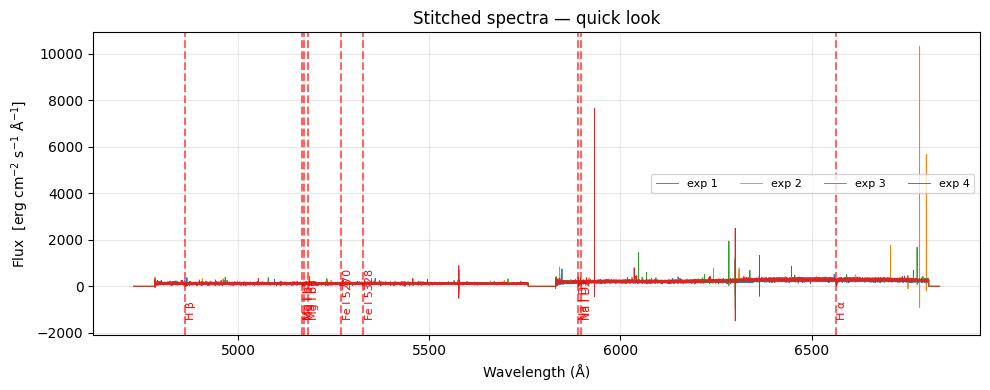

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.stats import mad_std

# ──────────────────────────────────────────────────────────────────────────
#  QUICK-LOOK SUMMARY TABLE
# ──────────────────────────────────────────────────────────────────────────
print(f"{'idx':>3}  {'DATE-OBS':19}  {'λmin–λmax (Å)':23}  {'Npix':>6}  "
      f"{'med(F)':>9}  {'σ_MAD':>9}")

for i, (spec, hdr) in enumerate(spectra):
    lam = spec.spectral_axis.value           # Å
    med = np.median(spec.flux.value)
    sig = mad_std(spec.flux.value)           # robust scatter
    print(f"{i:3d}  {hdr['DATE-OBS']}  "
          f"{lam[0]:7.1f}–{lam[-1]:7.1f}  {len(lam):6d}  "
          f"{med:9.3g}  {sig:9.3g}")

# ──────────────────────────────────────────────────────────────────────────
#  OVERPLOT ALL SELECTED SPECTRA
# ──────────────────────────────────────────────────────────────────────────
plt.figure(figsize=(10,4))
colors = plt.cm.tab10.colors                # up to 10 distinct colours

for i, (spec, hdr) in enumerate(spectra):
    plt.plot(spec.spectral_axis, spec.flux,
             color=colors[i % 10], lw=0.6, label=f"exp {i+1}")

plt.xlabel("Wavelength (Å)")
plt.ylabel(r"Flux  [erg cm$^{-2}$ s$^{-1}$ Å$^{-1}$]")
plt.title("Stitched spectra — quick look")
plt.grid(alpha=.3)
plt.legend(ncol=min(len(spectra),4), fontsize=8)
plt.tight_layout()

# ──────────────────────────────────────────────────────────────────────────
#  VERTICAL FEATURE LINES (only those within plotted λ-range)
# ──────────────────────────────────────────────────────────────────────────
lam_min = min(spec.spectral_axis.value[0]  for spec, _ in spectra)
lam_max = max(spec.spectral_axis.value[-1] for spec, _ in spectra)

ymin, ymax = plt.ylim()

for _, row in spectral_lines.iterrows():
    wl    = row["Wavelength"]
    label = row["Label"]
    if lam_min <= wl <= lam_max:
        plt.axvline(wl, color='red', ls='--', alpha=0.6)
        plt.text(wl + 3, ymin + 0.05*(ymax - ymin), label,
                 rotation=90, color='red', fontsize=8, va='bottom')

plt.show()



In [ ]:
import plotly.graph_objects as go
from plotly.colors import qualitative
import itertools

# ─────────────────────────────────────────────────────────────
# 1. Build interactive figure for *all* spectra in `spectra`
# ─────────────────────────────────────────────────────────────
fig = go.Figure()

# Use an endless colour cycle (Plotly’s qualitative palette)
color_cycle = itertools.cycle(qualitative.Plotly)

for i, (spec, hdr) in enumerate(spectra):
    fig.add_trace(
        go.Scatter(
            x=np.asarray(spec.spectral_axis),           # Å
            y=np.asarray(spec.flux),                    # flux units
            mode="lines",
            line=dict(width=1, color=next(color_cycle)),
            name=f"exp {i+1}  ({hdr['DATE-OBS']})"
        )
    )

fig.update_layout(
    title="Stitched spectra (interactive)",
    xaxis_title="Wavelength (Å)",
    yaxis_title="Flux  [erg cm⁻² s⁻¹ Å⁻¹]",
    template="plotly_white",
    height=450,
    legend=dict(orientation="h", yanchor="bottom", y=1.02,
                xanchor="right",  x=1)
)

# ─────────────────────────────────────────────────────────────
# 2. Global wavelength / flux limits for the current figure
#    (works for any number of traces & any λ range)
# ─────────────────────────────────────────────────────────────
wave_min = min(trace.x.min() for trace in fig.data)
wave_max = max(trace.x.max() for trace in fig.data)
flux_min = min(trace.y.min() for trace in fig.data)
flux_max = max(trace.y.max() for trace in fig.data)

margin   = 0.03 * (flux_max - flux_min)   # 3 % margin for labels
y_label  = flux_max + margin

# ─────────────────────────────────────────────────────────────
# 3. Vertical feature lines & annotations (only if inside range)
# ─────────────────────────────────────────────────────────────
for _, row in spectral_lines.iterrows():
    wl, label = row["Wavelength"], row["Label"]
    if wave_min <= wl <= wave_max:               # keep plot tidy
        # dashed vertical line
        fig.add_shape(
            type="line",
            x0=wl, x1=wl,
            y0=flux_min, y1=flux_max,
            line=dict(color="red", width=1, dash="dash"),
            layer="below"
        )
        # text annotation
        fig.add_annotation(
            x=wl, y=y_label,
            text=label,
            showarrow=False,
            textangle=90,
            yanchor="bottom",
            font=dict(size=10, color="red")
        )

# extend y-axis so the label row is visible
fig.update_yaxes(range=[flux_min, y_label + margin])

fig.show()



In [ ]:
# 2.   Re-bin 2–3 pixels → 1 before stacking
from spectres import spectres   # pip install spectres

# common grid: choose the *worst* (largest) dispersion after bary shift
disp   = max( np.median(np.diff(s.spectral_axis)) for s, _ in spectra )
lam_lo = max(s.spectral_axis[0]  for s,_ in spectra).value
lam_hi = min(s.spectral_axis[-1] for s,_ in spectra).value
common_grid = np.arange(lam_lo, lam_hi, 3*disp.value) * u.angstrom  # 3-pixel bin

binned = []
for spec, hdr in spectra:
    reb_flux = spectres(common_grid.value, spec.spectral_axis.value,
                        spec.flux.value)
    binned.append( Spectrum1D(flux=reb_flux*spec.flux.unit,
                              spectral_axis=common_grid) )
    

    



/home/scotdevlin/spec_analysis_sline7/sline/myenv/lib/python3.12/site-packages/spectres/spectral_resampling.py:104: RuntimeWarning:

Spectres: new_wavs contains values outside the range in spec_wavs, new_fluxes and new_errs will be filled with the value set in the 'fill' keyword argument (by default 0).



        Use Spectrum instead. [warnings]


In [ ]:
rest_wavelength

6562.8

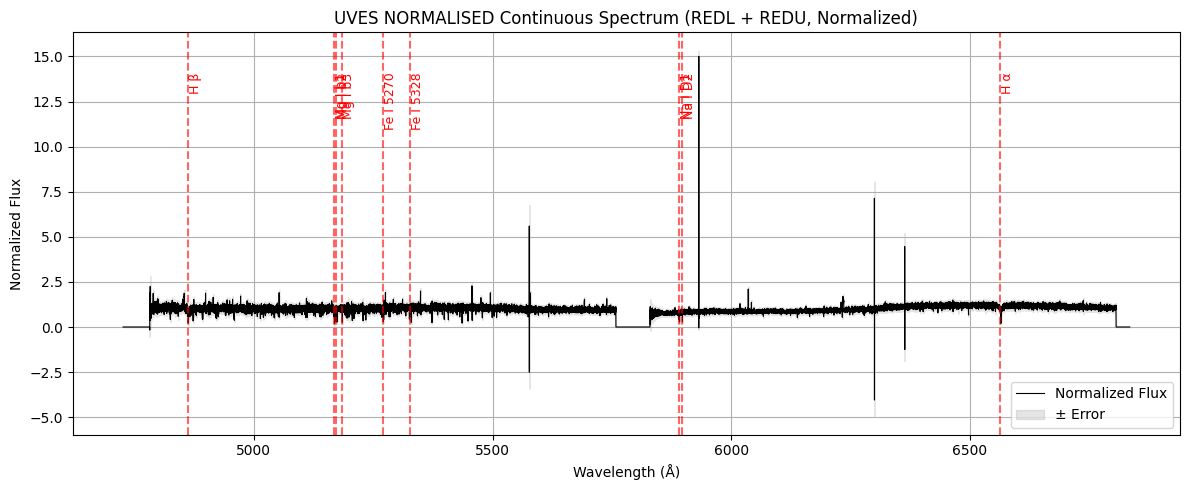

In [ ]:
#  NOrMALIZE the U pper  and  L  ower  arms separately  AND then concatenate them   NOTE: continuum fitting with a polynomial or spline


# --- Continuum normalize each arm separately ---
median_flux_L = np.median(flux_data_L)
median_flux_U = np.median(flux_data_U)

# REDL (lower) arm
flux_data_red_lower = flux_data_L / median_flux_L
error_data_red_lower = error_data_L / median_flux_L

# REDU (upper) arm
flux_data_red_upper = flux_data_U / median_flux_U
error_data_red_upper = error_data_U / median_flux_U


# --- Concatenate both arms and sort by wavelength ---
wavelength = np.concatenate([wavelength_L, wavelength_U])
flux_data  = np.concatenate([flux_data_red_lower,  flux_data_red_upper])
error_data = np.concatenate([error_data_red_lower, error_data_red_upper])

sort_indices = np.argsort(wavelength)
wavelength = wavelength[sort_indices]
flux_data  = flux_data[sort_indices]
error_data = error_data[sort_indices]

# --- Plot continuous, normalized spectrum ---
plt.figure(figsize=(12, 5))
plt.plot(wavelength, flux_data, color='k', lw=0.8, label="Normalized Flux")
plt.fill_between(wavelength,
                 flux_data - error_data,
                 flux_data + error_data,
                 color='gray', alpha=0.2, label="± Error")
plt.xlabel("Wavelength (Å)")
plt.ylabel("Normalized Flux")
plt.title("UVES NORMALISED Continuous Spectrum (REDL + REDU, Normalized)")
plt.grid(True)
plt.legend()
plt.tight_layout()


# Get current plot y-limits
ymin, ymax = plt.ylim()
# Loop through the DataFrame and add only visible lines
for _, row in spectral_lines.iterrows():
    label = row["Label"]
    wl = row["Wavelength"]
    # Only plot lines that fall within the displayed wavelength range
    if wavelength[0] <= wl <= wavelength[-1]:
        plt.axvline(x=wl, color='red', linestyle='--', alpha=0.6)
        plt.text(wl + 2, ymax - 0.1 * (ymax - ymin), label,
                 color='red', rotation=90, fontsize=9, va='top')

plt.show()


In [ ]:
header_U['HELICORR'] -  header_L['HELICORR']  #  difference in heliocentric correction between the two arms

0.0

Observed Hα line center: 6564.81 Å
Radial velocity shift:    91.65 km/s
Heliocentric velocity:    70.33 km/s
Barycentric velocity:     70.32 km/s


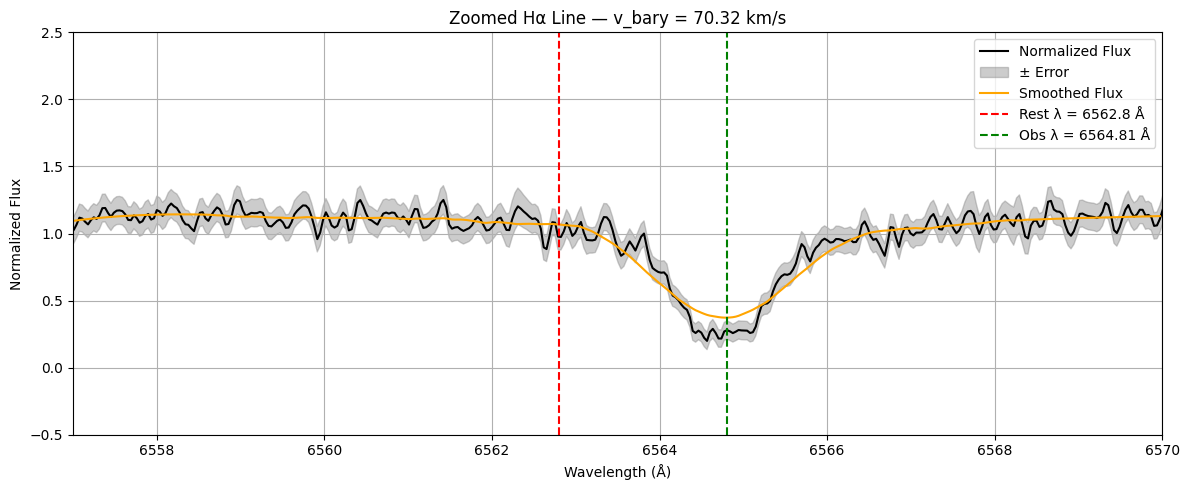

In [ ]:
# === DYNAMIC ZOOM FOR Hα WITH FIXED Y-LIMITS ===

from scipy.signal import savgol_filter

# Step 1: Define zoom region
x_start, x_end = 6557, 6570

# Step 2: Mask for that x-region (after concatenation and normalization)
mask_zoom = (wavelength >= x_start) & (wavelength <= x_end)
w_zoom = wavelength[mask_zoom]
f_zoom = flux_data[mask_zoom]
e_zoom = error_data[mask_zoom]

# Step 3: Smooth the zoomed flux
if len(f_zoom) >= 71:
    f_smooth = savgol_filter(f_zoom, window_length=91, polyorder=3)
else:
    raise ValueError("Zoom region too small for chosen smoothing window.")

# Step 4: Find the absorption core wavelength
idx_min = np.argmin(f_smooth)
observed_wavelength = w_zoom[idx_min]

# Step 5: Compute velocities
rest_wavelength = 6562.8  # Hα in Å
delta_lambda   = observed_wavelength - rest_wavelength
velocity        = (delta_lambda / rest_wavelength) * 299792.458  # km/s
velocity_helio  = velocity + header_L['HELICORR']  # Use REDL header
velocity_bary   = velocity + header_L['BARYCORR']

print(f"Observed Hα line center: {observed_wavelength:.2f} Å")
print(f"Radial velocity shift:    {velocity:.2f} km/s")
print(f"Heliocentric velocity:    {velocity_helio:.2f} km/s")
print(f"Barycentric velocity:     {velocity_bary:.2f} km/s")

# Step 6: Plot
plt.figure(figsize=(12, 5))
plt.plot(wavelength, flux_data, color='k', label="Normalized Flux")
plt.fill_between(wavelength,
                 flux_data - error_data,
                 flux_data + error_data,
                 color='gray', alpha=0.4, label='± Error')

plt.plot(w_zoom, f_smooth, color='orange', label='Smoothed Flux')
plt.axvline(x=rest_wavelength,     color='red',   linestyle='--', label="Rest λ = 6562.8 Å")
plt.axvline(x=observed_wavelength, color='green', linestyle='--', label=f"Obs λ = {observed_wavelength:.2f} Å")

plt.xlabel("Wavelength (Å)")
plt.ylabel("Normalized Flux")
plt.title(f"Zoomed Hα Line — v_bary = {velocity_bary:.2f} km/s")
plt.grid(True)
plt.xlim(x_start, x_end)
plt.ylim(-0.5, 2.5)  # Fixed y-axis limits for comparison across epochs
plt.legend()
plt.tight_layout()
plt.show()
